# WCPP: data collection

## Contents

- [Introduction](#introduction)
- [Libraries](#libraries)
- [Functions and settings](#functions_and_settings)
- [Datasets collection](#datasets_collection) 
  - [List of datasets](#list_of_datasets) 
  - [Data importing](#data_importing)
- [Datasets exploration](#datasets_exploration)
  - [Oxford Supertracker](#oxford_supertracker)
    - [Type](#type)
    - [Policy area and focus](#policy_area_and_focus)
    - [Dates](#dates)
    - [Authors, source, and provider](#authors_source_and_provider)
    - [World region, country coverage, level of observation](#world_region_country_coverage_level_of_observation)
- [Conclusion](#conclusion)

## Introduction
<a id='introduction'></a>

<div class="alert-info">
This notebook finds, imports and discusses datasets that tracked policies by governments around the world towards the Covid-19 pandemic. It shows what data was collected around the period from early 2020 to late 2022, gauging the quality of information available to researchers investigating the decisions made by policy-makers. It also selects datasets that meet the needs of the Worldwide Covid Policy Project. 
<br>
      
Knowing the landscape of data available on policy-making during the pandemic is useful, because it defines some of the boundaries within which humanity will be able to learn from what it did during the spread of the disease. While further data can be created by retrospective collection; and the value of the quantitative information available is only realisable with qualitative, contextual understanding that is not recorded in the datasets; the pandemic has passed and it is fair to assume that a great majority of data on it has already been collected. Understanding the size and quality of the dataspace therefore guides what can be learned about the decisions made and programmes implemented, and may also prompt improvements in data collection ahead of future crises.   

The Worldwide Covid Policy Project seeks to address the following questions:
 
- 1) What was the policy space available to governments?
- 2) Which parts of the policy space did governments use?
- 3) Why did governments use parts of the policy space?

To find any answers to the questions, the project needs datasets that meet the following criteria:

- 1) The data cover the period from at least early 2020 to late 2022.
- 2) There is enough data to allow staistical confidence in any computation.
- 3) There are sufficient variables to proxy the policy space available to decision-makers.
- 4) Enough administrative areas are covered around the world to allow for insightful comparative research.     
- 5) The data is available on open principles, allowing others to replicate the analysis and findings. 

There are numerous datasets available, many of which were conveniently tracked by the <a href="https://supertracker.spi.ox.ac.uk/policy-trackers/" target="_blank">Oxford Supertracker</a>. These are considered below with the  <a href="https://opendatacharter.net/principles/" target="_blank">Open Data Charter</a> principle of the data being 'accessible and usable' in mind. The <a href="https://supertracker.spi.ox.ac.uk/surveys/" target="_blank">surveys</a> collected by the tracker are left for any research on policy conditions and effects. All other non-machine readable entries are removed from the tracker, with the aim of creating a meta-database of Covid policy databases.   
    
</div>

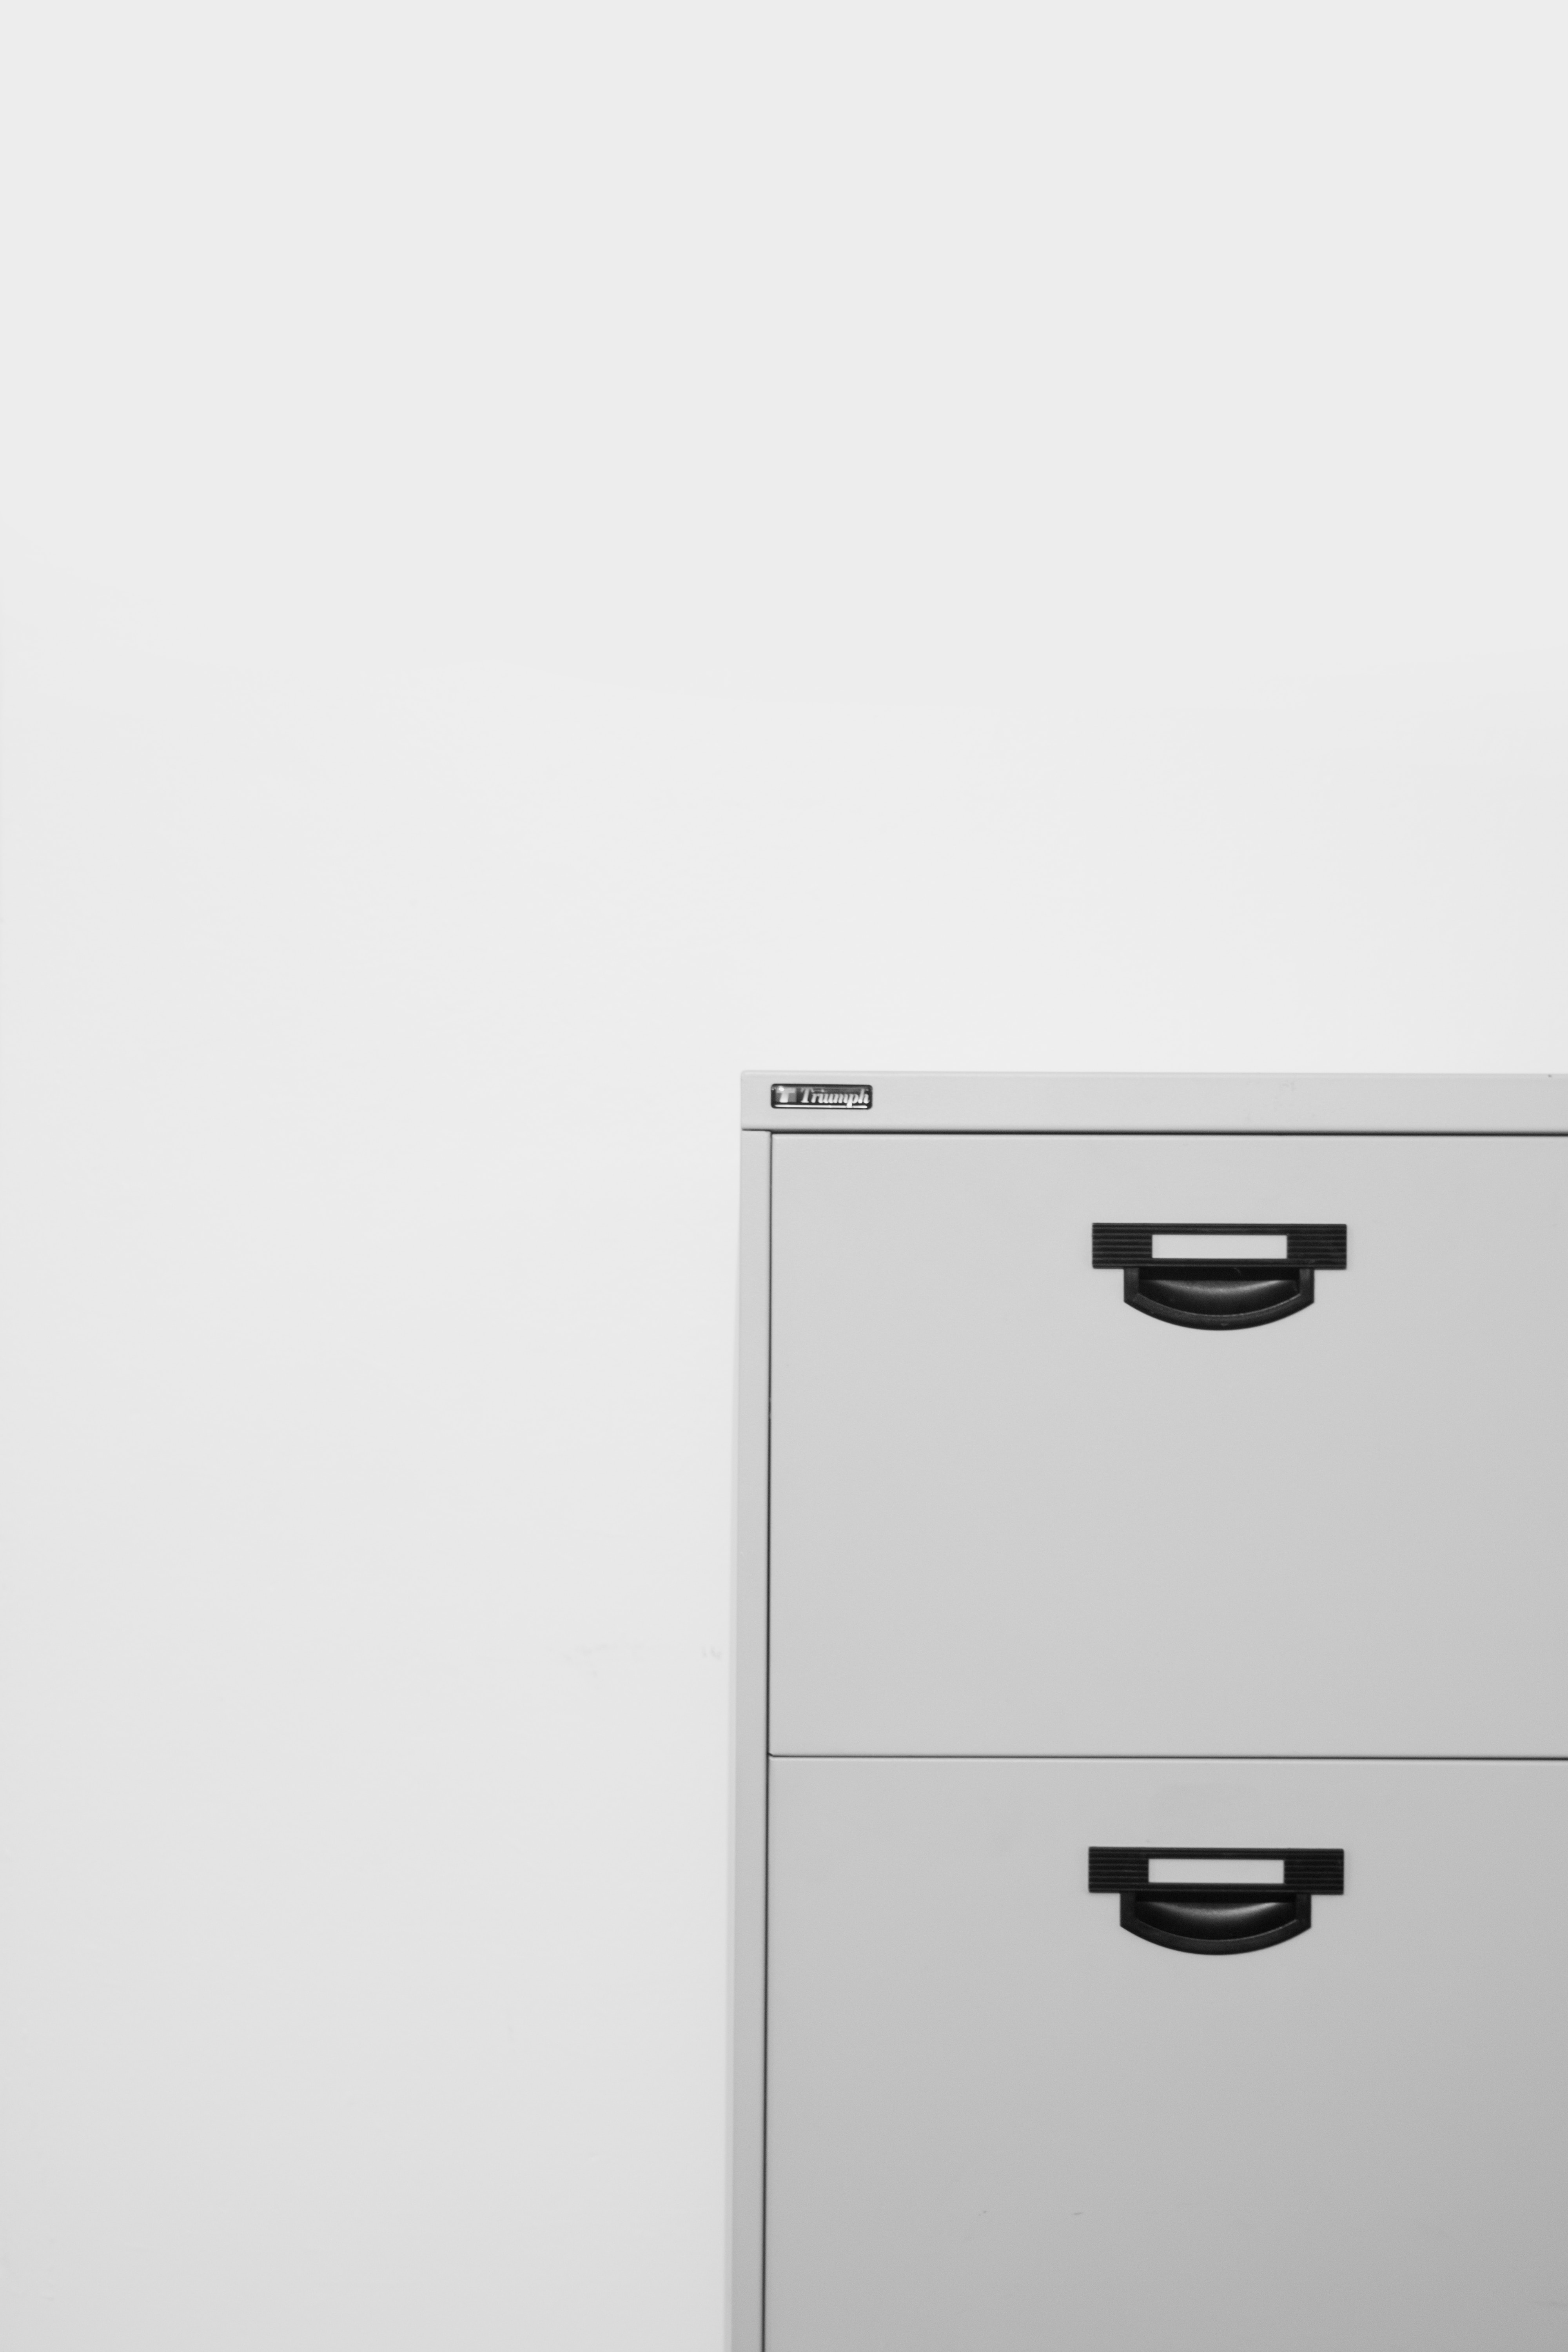

## Libraries
<a id='libraries'></a>

<div class="alert-info">
Importing libraries and packages that are used in the notebook. 
</div>

In [3681]:
# Imports packages for managing and manipulating data
import pandas as pd
import numpy as np

# Imports packages for visualising data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

## Functions and settings
<a id='functions_and_settings'></a>

<div class="alert-info">
Stating functions that are used in the notebook, and any adjustments to the operation of Python, Jupyter Notebook, and suchlike. 
</div>

In [3682]:
# EDA checking function to test for basic aspects of data quality
def EDA_checks(dataset):
    #Prints the row labels
    print('ROW LABELS')
    print('')
    print(dataset.index)
    print('')
    #Prints the column names
    print('COLUMN NAMES')
    print('')
    print(dataset.columns)
    print('')
    #Prints the number of rows and columns
    print('NUMBER OF ROWS AND COLUMNS')
    print('')
    print(dataset.shape)
    print('')
    #Prints a concise summary of the dataset
    print('CONCISE SUMMARY')
    print('')
    print(dataset.info())
    print('')
    #Prints a concise summary of the dataset
    print('DESCRIPTION OF ALL COLUMNS')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    #Prints the number of null values in the dataset
    print('NUMBER OF NULL VALUES BY COLUMN')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    print(dataset.isnull().sum())

In [3683]:
# Function to check for missing and duplicated values across a dataset
def missing_and_duplicated(dataset):
    print('DUPLICATES')
    print('')
    # Gives the sum of the duplicated rows in the dataframe
    duplicated_rows_sum = dataset.duplicated().sum()   
    print(f'There are {duplicated_rows_sum} duplicated rows in the dataset.')
    print('')
    print('The duplicated rows are as follows:')
    # Locates the duplicated rows of in the dataframe
    duplicated_rows = dataset[dataset.duplicated(keep=False)]
    display(duplicated_rows)
    print('NULLS')
    print('')
    # Gives the sum of null values
    null_values_sum = dataset.isna().sum().sum()
    print(f'There are {null_values_sum} null values in the dataset.')
    print('')
    print('The null values are in the following columns:')
    # Gives missing values by the rows in the dataframe
    null_values_by_column = dataset.isna().sum(axis = 0)
    display(null_values_by_column)
    print('')
    print('The null values above account for the following percentages of all null values:')
    # Gives the number of missing entries as a percentage of the dataframe, using the result from 'shape'
    nulls_percentage = dataset.isna().sum(axis = 0) / dataset.shape[0] * 100 
    display(nulls_percentage)

In [3684]:
# Sets column widths to show all of the text, when un-hashed
#pd.set_option('display.max_columns', None)
#pd.set_option('display.expand_frame_repr', None)
#pd.set_option('max_colwidth', None)

## Datasets collection
<a id='datasets_collection'></a>

<div class="alert-info">
Showing, importing and initially investigating datasets that have been listed by the Oxford Supertracker. 
</div>

### List of datasets
<a id='list_of_datasets'></a>

<div class="alert-info">
The datasets used in the notebook: <a href="https://supertracker.spi.ox.ac.uk/policy-trackers/" target="_blank">Oxford Supertracker</a>
</div>

### Data importing
<a id='data_importing'></a>

<div class="alert-info">
Importing the datasets used in the notebook. 
</div>

In [3685]:
# Imports Oxford Supertracker list of Covid-19 policy datasets
oxford_supertracker = pd.read_csv('/Users/lawrencekay/CSS/Projects/wcp/data/oxford_supertracker_policy_trackers.csv')

## Datasets exploration
<a id='datasets_exploration'></a>

<div class="alert-info">
The first objective for this notebook is to gauge the quantity and quality of data on Covid policy-making available to researchers, thereafter selecting which might be best for answering the Worldwide Covid Policy Project questions. We'll address the first by looking at the Oxford Supertracker, and then second by considering select datasets in it. 
</div>

### Oxford Supertracker
<a id='oxford_supertracker'></a>

<div class="alert-info">
Let's start by having a look at the number and size of the Covid-19 policy datasets available. 
</div>

In [3686]:
# Reads the Oxford Supertracker list
oxford_supertracker

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WHO PHSM: Public health and social measures,https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm,Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy,"measures or actions by individuals, institutions, communities, local and national governments and international bodies to slow or stop the spread of an infectious disease. Establishing one single open-content dataset by merging pre-existing datasets from WHO, the London School of Hygiene and Tropical Medicine, ACAPS, University of Oxford, Global Public Health Intelligence Network, US Centers for Disease Control and Prevention and the Complexity Science Hub Vienna.",worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; GAB; GMB; GEO; DEU; GHA; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LAO; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; FSM; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; REU; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; GGY; IMN; JEY; MNE; SRB; SSD,csv,[WHO](https://twitter.com/WHO),Policy Tracker,national,2020-01-04,up-to-date,Governmental agencies; International organisations; Academics; Think tanks,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations
2,COVID19 Government Measures Dataset,https://www.acaps.org/covid19-government-measures-dataset,Non-Pharmaceutical Interventions; Health and Care Policy,"implemented governments measures structured by 1) Social distancing, 2) Movement restrictions, 3) Public health measures, 4) Social and economic measures, 5) Lockdowns",worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; MNE; SRB; SSD,xlsx,[ACAPS](https://twitter.com/ACAPSproject),Policy Tracker,national,2020-01-01,2021-01-15,Governmental agencies; International organisations; Think tanks; Media,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics
3,Oxford COVID19 Government Response Tracker,https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker,No

<div class="alert-info">
The Oxford Supertracker has obviously monitored a great many Covid datasets, and let's look at its head and tail.  
</div>

In [3687]:
# Gives the top of the dataset
oxford_supertracker.head()

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WHO PHSM: Public health and social measures,https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm,Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy,"measures or actions by individuals, institutions, communities, local and national governments and international bodies to slow or stop the spread of an infectious disease. Establishing one single open-content dataset by merging pre-existing datasets from WHO, the London School of Hygiene and Tropical Medicine, ACAPS, University of Oxford, Global Public Health Intelligence Network, US Centers for Disease Control and Prevention and the Complexity Science Hub Vienna.",worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; GAB; GMB; GEO; DEU; GHA; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LAO; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; FSM; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; REU; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; GGY; IMN; JEY; MNE; SRB; SSD,csv,[WHO](https://twitter.com/WHO),Policy Tracker,national,2020-01-04,up-to-date,Governmental agencies; International organisations; Academics; Think tanks,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations
2,COVID19 Government Measures Dataset,https://www.acaps.org/covid19-government-measures-dataset,Non-Pharmaceutical Interventions; Health and Care Policy,"implemented governments measures structured by 1) Social distancing, 2) Movement restrictions, 3) Public health measures, 4) Social and economic measures, 5) Lockdowns",worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; MNE; SRB; SSD,xlsx,[ACAPS](https://twitter.com/ACAPSproject),Policy Tracker,national,2020-01-01,2021-01-15,Governmental agencies; International organisations; Think tanks; Media,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics
3,Oxford COVID19 Government Response Tracker,https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker,No

In [3688]:
# Gives the bottom of the dataset
oxford_supertracker.tail()

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
228,ECDC-JRC Response Measures Database,https://covid-statistics.jrc.ec.europa.eu/RMeasures,Non-Pharmaceutical Interventions,A regularly updated archive of non-pharmaceutical interventions (NPIs) in seven categories introduced by 30 countries in the European Union (EU) and European Economic Area (EEA).,BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; DEU; GRC; HUN; ISL; IRL; ITA; LVA; LIE; LTU; LUX; MLT; NLD; NOR; POL; PRT; ROU; SVK; SVN; ESP; SWE; AUT,csv; xlsx,[European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en); [Joint Research Centre](https://twitter.com/eu_sciencehub),Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; Media,NaN,West Europe; Eastern Europe & Central Asia,International organisations
229,COVID-19 School Data Hub,https://www.covidschooldatahub.com/,Education Policy,"A central database for educators, researchers, and policymakers to understand how the COVID-19 pandemic shaped students’ modes of learning in 2020-21 in the USA.",USA,html; csv; xlsx,[Emily Oster](https://emilyoster.net/),Policy Tracker,sub-national,2020-09-01,2021-05-31,Governmental agencies,NaN,North America,Academics
230,State Laws and Mandates by Vaccine,https://www.immunize.org/laws/,Vaccination,State mandates on immunization and vaccine-preventable diseases in the USA,USA,html,[Immunization Action Coalition](https://twitter.com/immunizeorg),Policy Tracker,sub-national,NaN,NaN,Governmental agencies,NaN,North America,NGOs
231,State COVID-19 Data and Policy Actions,https://www.kff.org/coronavirus-covid-19/issue-brief/state-covid-19-data-and-policy-actions/,Education Policy; Non-Pharmaceutical Interventions; Vaccination; Health and Care Policy; Cases and Deaths,"Includes state-level data on a variety of COVID-19 metrics, including the latest hotspots and hospitalizations; cases, deaths, and vaccinations by race and ethnicity; and cases and deaths at long-term care facilities. COVID-19 vaccine mandates, school-related policies, social distancing actions, and health policy actions",USA,html; csv,[Kaiser Family Foundation](https://twitter.com/KFF),Policy Tracker,sub-national,2020-03-11,up-to-date,Governmental agencies; Think tanks,NaN,North America,Think tanks
232,Exceptius: Exceptional powers in times of SARS-COV-2,https://exceptius.com/,Non-Pharmaceutical Interventions; Health and Care Policy; Civic Freedom and Human Rights,documents metrics of exceptional decision-making concerning civil and political rights and extending into the areas of non-pharmaceutical interventions and health.,AUT; BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; DEU; GRC; HUN; ISL; IRL; ITA; LVA; LTU; LUX; MLT; NLD; OMN; POL; PRT; ROU; SVK; SVN; ESP; SWE; CHE; GBR,csv; xlsx,"Egger, C.M.; de Saint Phalle, E.; Magni-Berton, R.; Aarts, C.W.A.M.; Roché S.",Policy Tracker,national; sub-national,2020-01-01,2021-04-30,Governmental agencies; Media,NaN,European Union; West Europe; North America,Academics


<div class="alert-info">
From just a quick view of the datasets listed, it looks like there will be a spread across a great many topic areas available for comparing countries. There could also be a good number that cover the right time window. 
<br>    
    
Now let's get a more comprehensive view of what's in the tracker by running some basic checks on the dataset. 
</div>

In [3689]:
# Runs basic EDA checks on the dataset
EDA_checks(oxford_supertracker)

ROW LABELS

RangeIndex(start=0, stop=233, step=1)

COLUMN NAMES

Index(['Title', 'Link', 'Policy Area', 'Focus', 'Country Coverage',
       'Data Format', 'Authors', 'Type', 'Level of Observation', 'Start Date',
       'End Date', 'Source', 'Language', 'World Region', 'Provider'],
      dtype='object')

NUMBER OF ROWS AND COLUMNS

(233, 15)

CONCISE SUMMARY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 232 non-null    object
 1   Link                  232 non-null    object
 2   Policy Area           232 non-null    object
 3   Focus                 232 non-null    object
 4   Country Coverage      232 non-null    object
 5   Data Format           231 non-null    object
 6   Authors               232 non-null    object
 7   Type                  188 non-null    object
 8   Level of Observation  217 non

<div class="alert-info">
The tracker looks like it has a lot of interesting variety in it, with enough consistency across the column counts to mean that the data might not be too much of a mess. Interestingly, the most null values are found in the 'type' and 'level of observation' columns - a pattern which is also basically repeated for the rows - which might be because these characteristics are ambiguous for some datasets. Let's see. 
<br>
    
Let's check for missing and duplicated entries in more depth. 
</div>

In [3690]:
# Checks for missing and duplicated rows and columns in the dataset
missing_and_duplicated(oxford_supertracker)

DUPLICATES

There are 0 duplicated rows in the dataset.

The duplicated rows are as follows:


,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider


NULLS

There are 313 null values in the dataset.

The null values are in the following columns:


Title                     1
Link                      1
Policy Area               1
Focus                     1
Country Coverage          1
Data Format               2
Authors                   1
Type                     45
Level of Observation     16
Start Date                5
End Date                  5
Source                    1
Language                230
World Region              1
Provider                  2
dtype: int64


The null values above account for the following percentages of all null values:


Title                    0.429185
Link                     0.429185
Policy Area              0.429185
Focus                    0.429185
Country Coverage         0.429185
Data Format              0.858369
Authors                  0.429185
Type                    19.313305
Level of Observation     6.866953
Start Date               2.145923
End Date                 2.145923
Source                   0.429185
Language                98.712446
World Region             0.429185
Provider                 0.858369
dtype: float64

<div class="alert-info">
There are no duplicated rows in the dataset, thankfully, but null values are found in nearly all of the columns. The type, level of observation, and language, hold most of them. The last of these might not be an issue as the language is likely to be English. The start and end dates might be more troublesome, as they will be necessary to make the data usable. 
<br>
    
Before we get into looking at what's in the datasets, let's count how many there are. From just the view of the head of the tracker, we saw that row zero is empty. And from the basic checks just above, that means that there should be 232 datasets. But let's verify that.      
    
</div>

In [3691]:
# Drops row zero from the dataset
oxford_supertracker.drop(index = 0, inplace = True)

In [3692]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [3693]:
# Checks the change
oxford_supertracker

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
0,WHO PHSM: Public health and social measures,https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm,Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy,"measures or actions by individuals, institutions, communities, local and national governments and international bodies to slow or stop the spread of an infectious disease. Establishing one single open-content dataset by merging pre-existing datasets from WHO, the London School of Hygiene and Tropical Medicine, ACAPS, University of Oxford, Global Public Health Intelligence Network, US Centers for Disease Control and Prevention and the Complexity Science Hub Vienna.",worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; GAB; GMB; GEO; DEU; GHA; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LAO; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; FSM; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; REU; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; GGY; IMN; JEY; MNE; SRB; SSD,csv,[WHO](https://twitter.com/WHO),Policy Tracker,national,2020-01-04,up-to-date,Governmental agencies; International organisations; Academics; Think tanks,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations
1,COVID19 Government Measures Dataset,https://www.acaps.org/covid19-government-measures-dataset,Non-Pharmaceutical Interventions; Health and Care Policy,"implemented governments measures structured by 1) Social distancing, 2) Movement restrictions, 3) Public health measures, 4) Social and economic measures, 5) Lockdowns",worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; MNE; SRB; SSD,xlsx,[ACAPS](https://twitter.com/ACAPSproject),Policy Tracker,national,2020-01-01,2021-01-15,Governmental agencies; International organisations; Think tanks; Media,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics
2,Oxford COVID19 Government Response Tracker,https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker,Non-Pharmaceutical Interventions; Health and Care Policy; Macroe

In [3694]:
# Counts the number of original entries
number_original_entries = oxford_supertracker['Title'].nunique()

# Gives the number of unique entries for the level of observation
print(f"There are {number_original_entries} original entries in the dataset.") 

There are 232 original entries in the dataset.


<div class="alert-info">
What are the dataset names? 
</div>

In [3695]:
# Gets the list of dataset names from the tracker
datasets_names = pd.DataFrame(oxford_supertracker['Title'])

# Shows list of names
datasets_names.sample(50)

,Title
148,Mobility and border control in response to the COVID-19 outbreak dataset
24,Policy Responses to COVID-19 in Asia and the Pacific
27,Firm-level risk Covid-19 exposure
196,Federal Contractor Misconduct Database (FCMD)
25,The Opportunity Insights Economic Tracker
134,Covid-19 Policy Tracker
95,World Bank Group's Operational Response to COVID-19 (coronavirus) - Projects List
185,UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak
164,COVID-19 Financial Assistance and Debt Service Relief
149,International travel restrictions in response to the COVID-19 outbreak dataset


<div class="alert-info">
So, we can see that there seem to be a good number of datasets that could have interesting information for a comparative analysis. The themes cover topics such as education, economic stimulus, prisons, and health. And because we've dropped the empty row, every row has at least policy and country coverage information. 
    
<br>
    
But we're only interested in numeric data so let's look at the formats used. 
</div>

In [3696]:
# Shows the entries for the data formats
oxford_supertracker['Data Format'].unique()

array(['csv', 'xlsx', 'csv; API', 'csv; xlsx', 'html; csv', 'csv;',
       'xlsx; csv', 'csv;  xlsx', ' html; xlsx',
       ' html; non-downloadable', ' pdf; html', ' pdf', 'xlsx; pdf',
       ' html; pdf', ' csv; tsv; dta', ' html; csv; xlsx', ' xlsx',
       ' csv', ' pdf; xlsx', 'html; pdf; csv', ' pdf; html; xlsx',
       ' html; csv; json', 'csv; xlsx; pdf; html', 'csv;  html',
       ' pdf; json', ' csv; json', ' csv; pdf', ' csv; html', 'docx',
       ' xlsx; csv; html', ' xlsx; pdf; html', 'pdf',
       'html; non-downloadable', 'csv; PostgreSQL', 'html; pdf',
       'xlsx; dta', 'xlsx; csv; json', 'xlsx; json', 'html', 'csv; html',
       nan, 'csv;xlsx', 'xlsx; html', 'html; pdf; docx',
       'csv; xlsx; rdf; rss', 'html; csv; xlsx; pdf', 'html; pdf; xlsx',
       'html; xlsx', 'html; pdf; xlsx; docx',
       'csv; json; kmz; rdf; rss; xlsx', 'csv; json',
       'html; csv; pdf; json', 'html; csv; xlsx'], dtype=object)

In [3697]:
# Shows the number of unique data format entries
print(f"There are {len(oxford_supertracker['Data Format'].unique())} types of data format in the dataset.")

There are 53 types of data format in the dataset.


<div class="alert-info">
There are a couple of entries that are known to have additiona data formats, so let's change those:
<br>
    
- Real Time Population Survey, which offers data in the 'xlsx' format. 
- Vera Institute of Justice prison data, which offers data in the 'csv' format. 
</div>

In [3698]:
# Changes the Real Time Population Survey data format
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Real Time Population Survey', ['Data Format']] = 'html; pdf; xlsx'


In [3699]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Real Time Population Survey']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
30,Real Time Population Survey,https://sites.google.com/view/covid-rps,Macroeconomic and Financial Policy; Social and Employment Policy,bi-weekly online household survey that aims to provide more timely and more frequent version of the official labor market survey used to produce unemployment rate numbers etc.,USA,html; pdf; xlsx,Alexander Bick; [Adam Blandin](https://twitter.com/AdamBlandin);\n[Dallas Fed](https://twitter.com/DallasFed),Policy Tracker,national,2020-03-29,up-to-date,Academics,NaN,North America,Academics


In [3700]:
# Changes the Vera Institute of Justice prison data format
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Vera Institute of Justice prison data', ['Data Format']] = 'html; pdf; xlsx; csv'

In [3701]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Vera Institute of Justice prison data']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
89,Vera Institute of Justice prison data,https://www.vera.org/blog/covid-19-1/use-this-data-to-hold-your-local-jail-accountable-during-the-pandemic,"Prisons, Courts and Judiciary Systems; Cases and Deaths",number of prisoners and #COVID19 cases and deaths per prison.,USA,html; pdf; xlsx; csv,[Vera Institute](https://twitter.com/verainstitute),Policy Tracker,national; sub-national,2020-04-08,up-to-date,Think tanks; Media,NaN,North America,Academics


<div class="alert-info">
Now let's drop the PDF entries. 
</div>

In [3702]:
# Finds the entries listed as only 'pdf'
oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
101,Emergency Transitions Monitor,https://www.lse.ac.uk/cities/research/urban-governance/Emergency-Governance-for-Cities-and-Regions,Regions and Cities,"The project is collecting and analysing data from cities and regions on how they are transitioning into and out of emergency modes. This monitor will initially focus on COVID-19 urban governance and actions while centrally considering interventions beyond the immediate crisis responses. In particular, it will monitor to what extent crisis response experiments may become new fixtures of post-crisis governance.",worldwide,pdf,Philipp Rode; Edgardo Bilsky; Oscar Chamat; [Nuno F da Cruz](https://twitter.com/NFdaCruz); Ainara FernÃ¡ndez Tortosa; Anna Calvete Moreno; [LSECities](https://twitter.com/LSECities),Policy Tracker,sub-national,2020-06-05,2022-04-01,Academics,NaN,worldwide,Companies
102,IZA Crisis Response Monitoring,https://covid-19.iza.org/crisis-monitor/,Social and Employment Policy,Short-Run Labor Market Impacts of COVID-19 and Initial Policy Measures. IZA has invited a small number of labor economists as country experts to jointly monitor these crisis responses.,AUT; FRA; DEU; ITA; NLD; PRT; SVK; ESP; SWE; CHE; GBR; USA,pdf,Werner Eichhorst; Paul Marx; Ulf Rinne; [IZA](https://twitter.com/iza_bonn),Policy Tracker,national,2020-02-24,up-to-date,International organisations; Think tanks,NaN,OECD; West Europe; North America,Academics
110,Coronavirus pandemic in the EU - Fundamental Rights Implications,https://fra.europa.eu/en/publication/2020/covid19-rights-impact-july-1#TabPubStudies,Civic Freedom and Human Rights,"civil, political and socioeconomic rights, such as: support for human rights systems and defenders, asylum, migration and borders, data protection, privacy and new technologies, equality, non-discrimination and racism, justice, victims’ rights and judicial cooperation",EU; AUT; BEL; BGR; HRV; CYP; DNK; EST; FIN; DEU; GRC; HUN; IRL; ITA; LVA; LTU; LUX; MLT; NLD; OMN; POL; PRT; ROU; SVK; SVN; ESP; SWE,pdf,[FRA European Union Agency for Fundamental Rights](https://twitter.com/EURightsAgency),Policy Tracker,national,2020-03-01,2020-07-29,International organisations; Think tanks,NaN,West Europe; Eastern Europe & Central Asia; European Union,European Union
119,ILO Monitor: COVID-19 and the world of work.,https://www.ilo.org/wcmsp5/groups/public/---dgreports/---dcomm/documents/briefingnote/wcms_749399.pdf,Social and Employment Policy,Change in employment and working hours by region and country income group,worldwide,pdf,[ILO](https://twitter.com/ilo),NaN,supranational,2020-01-01,2020-06-30,International organisations; Academics,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations
125,School education during COVID-19: Were teachers and students ready?,http://www.oecd.org/education/coronavirus-education-country-notes.htm,Education Policy,"The COVID-19 country notes aim to bring together evidence from various OECD education surveys, to examine countries’ responses to the COVID-19 crisis, with a view to inform and guide future policy responses to the crisis. These country notes focuses on the level of preparedness of educational systems to support the learning of students during the health crisis.",AUS; AUT; BEL; CAN; CHL; COL; CZE; DNK; EST; FIN; FRA; DEU; GRC; HUN; ISL; IRL; ISR; ITA; JPN; LVA; LTU; LUX; MEX; NLD; NZL; NOR; POL; PRT; RUS; RUS; SVN; ESP; SWE; CHE; TUR; GBR,pdf,[OECD Education](https://twitter.com/OECDEduSkills),NaN,national,NaN,NaN,International organisations,NaN,West Europe; North America; Latin America & the Caribbean; Eastern Europe & Central Asia; East Asia & Pacific; OECD,OECD; International organisations
135,International Review of Leave P

In [3703]:
# Counts the number of PDF entries
number_pdf_entries = (oxford_supertracker[oxford_supertracker['Data Format'] == ' pdf']) + (oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf'])

# Shows the number of PDF-only entries
print(f"There are {len(number_pdf_entries)} PDF-only entries in the dataset.")

There are 19 PDF-only entries in the dataset.


In [3704]:
# Drops PDF only entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf'].index)
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == ' pdf'].index)

In [3705]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 213 entries in the dataset, compared to 232 at the beginning.


In [3706]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
To judge whether to drop some more entries, let's find out which ones have 'pdf' entered as one of several formats.  
</div>

In [3707]:
# Finds entries with 'pdf' in the listed data formats
oxford_supertracker[oxford_supertracker['Data Format'].str.contains('pdf' or ' pdf', na=False)]

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
11,COVID19 Global Travel Navigator,https://c19navigator.mayerbrown.com/,Non-Pharmaceutical Interventions,"travel restrictions, quarantine requirements for travellers",worldwide; AFG; ALB; DZA; ASM; AND; AGO; AIA; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CPV; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; PYF; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GLP; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; PRK; KOR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MTQ; MRT; MUS; MYT; MEX; MNG; MSR; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; NIU; MNP; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; REU; ROU; RUS; RUS; RWA; SHN; KNA; LCA; WSM; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TWN; TJK; THA; TGO; TON; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; WLF; YEM; ZMB; ZWE; MNE; SRB; SSD; XKX; USA,pdf; html,[Mayer Brown](https://twitter.com/Mayer_Brown),Policy Tracker,national,up-to-date,up-to-date,Governmental agencies,NaN,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,Companies
15,Eastern Europe Coronavirus tracker,https://wiiw.ac.at/eastern-europe-coronavirus-tracker-economic-impact-rising-n-439.html,Macroeconomic and Financial Policy; Non-Pharmaceutical Interventions,"fiscal, monetary, public order",ALB; BLR; BIH; BGR; HRV; CZE; EST; HUN; KAZ; LVA; LTU; MDA; MNE; MKD; POL; ROU,pdf; html,[wiiw](https://twitter.com/wiiw_news);\n [Richard Grieveson](https://twitter.com/RicGri);\n [Julia Gruebler](https://twitter.com/JuliaGruebler);\n [Alexandra Bykova](https://twitter.com/alexbykova);\n [Mario Holzner](https://twitter.com/MarioHolzner),Policy Tracker,national,2020-01-01,2020-04-16,Governmental agencies; International organisations,NaN,Eastern Europe & Central Asia,Academics
20,IMF Fiscal Monitor,https://www.imf.org/en/Topics/imf-and-covid19/Fiscal-Policies-Database-in-Response-to-COVID-19,Macroeconomic and Financial Policy,"Summarizes key fiscal measures governments have announced or taken in selected economies in response to the COVID-19 pandemic, categorised by above-the-line measures, below-the-line measures, and guarantees.",worldwide; ALB; ARG; AUS; BGD; BEL; BRA; BGR; CAN; CHL; CHN; COL; CZE; DNK; EGY; ETH; EU; FIN; FRA; GEO; DEU; GHA; GNB; HND; IND; IDN; ITA; JPN; KAZ; KEN; KOR; MUS; MEX; MMR; NZL; NER; NGA; MKD; NOR; PAK; PER; PHL; POL; PRT; ROU; RUS; SAU; SEN; SRB; SGP; ZAF; ESP; SWE; CHE; THA; NLD; TUN; TUR; ARE; GBR; USA; UZB; VNM; ZMB,xlsx; pdf,[IMF](https://twitter.com/IMFNews),Policy Tracker,national,2020-01-08,2021-03-17,Governmental agencies; International organisations,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations
21,Policy Responses to COVID-19 in Asia and the Pacific,https://www.unescap.org/covid19/policy-responses,Macroeconomic and Financial Policy; Non-Pharmaceutical Interventions; Trade Policy and FDI,"non-pharmaceutical interventions; fiscal, monetary, financial and trade policy;",AFG; ASM; ARM; AUS; AZE; BGD; BTN; BRN; KHM; CHN; COK; FJI; PYF; GEO; GUM; GIN; HKG; IND; IDN; JPN; KAZ; KIR; PRK; KOR; KGZ; MYS; MDV; MHL; MNG; MMR; NRU; NPL; NCL; NZL; NIU; MNP; PAK; PLW; PNG; PHL; RUS; WSM; SGP; SLB; LKA; TJK; THA; TLS; TON; TUR; TKM; TUV; UZB; VUT,html; pdf,[United Nations ESCAP](http

<div class="alert-info">
PDF data formats are mixed with a range of other types, let's look at those other types and hopefully weed some out, starting with HTML-only ones.  
</div>

In [3708]:
# Finds the html-only entries
html_only_entries = oxford_supertracker[(oxford_supertracker['Data Format'] == 'html') | (oxford_supertracker['Data Format'] == ' html')]

# States the number of HTML-only entries
print(f"There ate {len(html_only_entries)} HTML-only entries.")

There ate 34 HTML-only entries.


In [3709]:
# Shows the HTML-only entries
html_only_entries

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
132,WFP Global Monitoring of School Meals During COVID-19 School Closures,https://cdn.wfp.org/2020/school-feeding-map/index.html,Health and Care Policy; Education Policy,"School closures and the number of children missing out on school meals, policy solutions from national governments and the World Food Programme",ARG; BRB; BLZ; BOL; BRA; BGR; CPV; CAN; CYM; CHL; COL; COK; CRI; DOM; SLV; FRA; GTM; IND; IRL; JAM; JPN; LBR; PER; ZAF; ESP; TTO; GBR; USA; URY,html,[World Food Programme](https://twitter.com/wfp),Policy Tracker,national,2020-03-16,2020-09-04,Governmental agencies; International organisations; Media,NaN,North America; West Europe; Latin America & the Caribbean; Sub-Saharan Africa; Southeast Asia,International organisations
147,UNINFO COVID-19 Data Portal,https://data.uninfo.org/,"International Development, Philanthropy; Health and Care Policy; Vaccination;",The data portal provides various indicators and documents that present United Nation’s implementation of socio-economic response programme to the impact of COVID-19.,worldwide,html,[United Nations Development Coordination Office](https://unsdg.un.org/about/development-coordination-office),Collection,national,2020-01-31,up-to-date,Governmental agencies; International organisations,NaN,worldwide,International organisations
154,SafeGraph COVID-19 Toolkit,https://www.safegraph.com/data-examples/reopening-the-economy-foot-traffic?s=US&d=12-27-2020&i=all,Non-Pharmaceutical Interventions; Behavioural Responses and Mobility,"Provides data and dashboards on foot traffic by US state and placement, such as supermarket, bar, hotel.",USA,html,[SafeGraph](https://twitter.com/safegraph),Policy Tracker,sub-national,2020-01-01,up-to-date,Governmental agencies; Academics,NaN,North America,Companies
155,Unacast COVID-19 Location Data Toolkit,https://www.unacast.com/covid19,Non-Pharmaceutical Interventions; Behavioural Responses and Mobility,"Provides data and dashboards on the impact of social distancing measures on mobility, retail industries and migration patterns.",USA,html,[Unacast](https://twitter.com/unacast),Policy Tracker,sub-national,2020-01-01,up-to-date,Governmental agencies; Academics,NaN,North America,Companies
157,Covid19 crisis: Mapping out trade union and social partners’ responses,https://tuac.org/news/covid19-crisis-mapping-out-trade-union-and-social-partners-responses/,Social and Employment Policy,Responses from trade unions and social partners to economic and labour market crisis during the COVID-19 pandemic.,AUS; AUT; BEL; CAN; DNK; EST; FIN; FRA; DEU; ISL; IRL; ISR; ITA; JPN; KOR; LUX; NLD; NZL; NOR; ESP; SWE; CHE; TUR; GBR; USA,html,[Trade Union Advisory Committee](https://twitter.com/tuacoecd),Policy Tracker,national,2020-03-12,2020-06-30,Governmental agencies; International organisations,NaN,West Europe; North America; East Asia & Pacific; Eastern Europe & Central Asia; OECD,International organisations
162,COVID-19 Strike Wave Interactive Map,https://paydayreport.com/covid-19-strike-wave-interactive-map/,Social and Employment Policy; Behavioural Responses and Mobility; Civic Freedom and Human Rights,Tracks strikes occurred across the United States related to COVID-19.,USA,html,[Payday Report](https://twitter.com/paydayreport),NaN,sub-national,2020-03-01,up-to-date,Media,NaN,North America,Media
163,COVID-19 Global Research Registry for Public Health and Social Sciences,https://converge.colorado.edu/resources/covid-19/public-health-social-sciences-registry,Collection of Sources; Research and Innovation,"A global registry for the identification of COVID-19-related research and risk reduction efforts, sharing project information registered by researchers worldwide. The work has been launched and supported by the National Science Foundation (USA).",worldwide,html,[Converge](https://converge.colorado.edu/),Collectio

<div class="alert-info">
HTML-only entries are of little use as they're just showing data on a webpage that can't be downloaded. Let's remove them.   
</div>

In [3710]:
# Drops PDF only entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == 'html'].index)
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == ' html'].index)

In [3711]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 179 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Now let's do the same thing with the other non-readable entries: ' html; non-downloadable', 'html; non-downloadable', ' pdf; html', ' html; pdf', 'html; pdf', ' pdf; json', 'docx', and 'html; pdf; docx'.  
</div>

In [3712]:
# Gets other non-readable entries
other_non_readable_entries = oxford_supertracker[(oxford_supertracker['Data Format'] == ' html; non-downloadable') 
                                                 | (oxford_supertracker['Data Format'] == 'html; non-downloadable')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; html')
                                                 | (oxford_supertracker['Data Format'] == ' html; pdf')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; json')
                                                 | (oxford_supertracker['Data Format'] == 'docx')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf; docx')]

# Shows other non-readable entries
other_non_readable_entries

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
10,COVID19 Afrique Données Recherche,https://www.covid19afrique.com/,Non-Pharmaceutical Interventions; Cases and Deaths,non-pharmaceutical interventions; cases and deaths (in French) for Francophone African countries and countries of Economic Community of West African States (ECOWAS),NGA; NER; BEN; CMR; CIV; BFA; MLI; MDG; GIN; GHA; SEN; TCD; TGO; CPV; LBR; GNB; GMB; SLE; MRT; MAR; DZA; TUN; BDI; RWA; GAB; COG; COD; DJI; SYC; COM; MUS; MDG,html; non-downloadable,[Emmanuel Bonnet](https://twitter.com/@mavalo76);\n[Valéry Ridde](https://twitter.com/ValeryRidde),Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; International organisations,French,Sub-Saharan Africa; Middle East & North Africa,Academics
11,COVID19 Global Travel Navigator,https://c19navigator.mayerbrown.com/,Non-Pharmaceutical Interventions,"travel restrictions, quarantine requirements for travellers",worldwide; AFG; ALB; DZA; ASM; AND; AGO; AIA; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CPV; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; PYF; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GLP; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; PRK; KOR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MTQ; MRT; MUS; MYT; MEX; MNG; MSR; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; NIU; MNP; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; REU; ROU; RUS; RUS; RWA; SHN; KNA; LCA; WSM; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TWN; TJK; THA; TGO; TON; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; WLF; YEM; ZMB; ZWE; MNE; SRB; SSD; XKX; USA,pdf; html,[Mayer Brown](https://twitter.com/Mayer_Brown),Policy Tracker,national,up-to-date,up-to-date,Governmental agencies,NaN,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,Companies
12,IMF policy tracker,https://t.co/tzG6SIT4o7?amp=1,Macroeconomic and Financial Policy,"fiscal, monetary and macroprudential",worldwide; AFG; ALB; DZA; AGO; AIA; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; LVA; LBN; LSO; LBR; LBY; LTU; LUX; MAC; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MSR; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TWN; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VNM; YEM; ZMB; ZWE; CUW; MNE; SRB; SSD; XKX,html; non-downloadable,[IMF](https://twitter.com/IMFNews),Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; International organisations,NaN,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,International organisations
15,Eastern Europe Coronavirus tracker,https://wiiw.ac.at/eastern-europe-coronavirus-tracker-economic-impact-rising-n-439.html,Macroeconomic and Financial Policy; N

In [3713]:
# Drops the other non-readable entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[(oxford_supertracker['Data Format'] == ' html; non-downloadable') 
                                                 | (oxford_supertracker['Data Format'] == 'html; non-downloadable')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; html')
                                                 | (oxford_supertracker['Data Format'] == ' html; pdf')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; json')
                                                 | (oxford_supertracker['Data Format'] == 'docx')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf; docx')].index)

In [3714]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 103 entries in the dataset, compared to 232 at the beginning.


In [3715]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
Let's look at the updated dataframe. 

</div>

In [3716]:
# Shows the updated dataframe
oxford_supertracker

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
0,WHO PHSM: Public health and social measures,https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm,Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy,"measures or actions by individuals, institutions, communities, local and national governments and international bodies to slow or stop the spread of an infectious disease. Establishing one single open-content dataset by merging pre-existing datasets from WHO, the London School of Hygiene and Tropical Medicine, ACAPS, University of Oxford, Global Public Health Intelligence Network, US Centers for Disease Control and Prevention and the Complexity Science Hub Vienna.",worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; GAB; GMB; GEO; DEU; GHA; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LAO; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; FSM; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; REU; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; GGY; IMN; JEY; MNE; SRB; SSD,csv,[WHO](https://twitter.com/WHO),Policy Tracker,national,2020-01-04,up-to-date,Governmental agencies; International organisations; Academics; Think tanks,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations
1,COVID19 Government Measures Dataset,https://www.acaps.org/covid19-government-measures-dataset,Non-Pharmaceutical Interventions; Health and Care Policy,"implemented governments measures structured by 1) Social distancing, 2) Movement restrictions, 3) Public health measures, 4) Social and economic measures, 5) Lockdowns",worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; MNE; SRB; SSD,xlsx,[ACAPS](https://twitter.com/ACAPSproject),Policy Tracker,national,2020-01-01,2021-01-15,Governmental agencies; International organisations; Think tanks; Media,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics
2,Oxford COVID19 Government Response Tracker,https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker,Non-Pharmaceutical Interventions; Health and Care Policy; Macroe

<div class="alert-info">
We've more than halved the number of entries, getting closer to a list of usable datasets for research. Having stripped many of them due to their entered data formats, but knowing that many will not have accessible data anyway, we'll have to look at the remaining links manually. 
    
<br>
    
Having done that, the following need to be deleted as they don't have any data at their links in a readable format. 
    
- Observatory of Government Restrictive Measures for the COVID-19 pandemic (GovRM-COVID19).
- Health Intervention Tracking for COVID-19 (HIT-COVID).
- The Dallas Fed Social Distancing Index.
    
As do these for a variety of reasons
    
- The COVID-19 EU PolicyWatch is a list of measures and a database on the policies adopted by European Union governments as they sought to mitigate the effects of the pandemic on workers and companies.
- COVID19 Government Measures Dataset doesn't seem to be maintained and the data does not download.
- socialdistancing.stanford.edu doesn't seem to have been maintained, or the project completed to provide a downloadable dataset.
- OECD Health System responses summary is just a PDF and needs to be deleted.
- Apple Mobility Trends Reports are no longer available.
- COVID-19 Public Media Dataset is no longer available.
- EPIC Tracker looks defunct and doesn't seem to have data to download.
- Covid-19 Policy Tracker seems to be defunct.
- Green Recovery Tracker doesn't seem to make its data available openly.
- Epidemic Forecasting: COVID-19 is no longer online.
- A good reason: A chronicle of stay-at-home orders in Europe appears to be broken.
- Covid-19 Food Policy in South Africa - The First Four Months doesn't have data to download. The same is true of Covid-19 Food Policy in England - The First Four Months and Covid-19 Food Policy in India - The First Four Months.
</div>

In [3717]:
# Removes Observatory of Government Restrictive Measures for the COVID-19 pandemic (GovRM-COVID19), using str.contains
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('GovRM-COVID19', na=False)].index)

In [3718]:
# Removes Health Intervention Tracking for COVID-19 (HIT-COVID)
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Health Intervention Tracking for COVID-19 (HIT-COVID)'].index)

In [3719]:
# Removes the Dallas Fed Social Distancing Index
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'The Dallas Fed Social Distancing Index'].index)

In [3720]:
# Removes the COVID-19 EU PolicyWatch
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 EU PolicyWatch', na=False)].index)

In [3721]:
# Removes the COVID19 Government Measures Dataset
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID19 Government Measures Dataset', na=False)].index)

In [3722]:
# Removes socialdistancing.stanford.edu
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('socialdistancing', na=False)].index)

In [3723]:
# Removes the OECD Health System responses summary
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('OECD Health System responses summary', na=False)].index)

In [3724]:
# Removes Apple Mobility Trends Reports
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Apple Mobility Trends Reports', na=False)].index)

In [3725]:
# Removes the COVID-19 Public Media Dataset
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Public Media Dataset', na=False)].index)

In [3726]:
# Removes the EPIC Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('EPIC Tracker', na=False)].index)

In [3727]:
# Removes the Covid-19 Policy Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Policy Tracker', na=False)].index)

In [3728]:
# Removes the Green Recovery Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Green Recovery Tracker', na=False)].index)

In [3729]:
# Removes Epidemic Forecasting: COVID-19
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Epidemic Forecasting: COVID-19', na=False)].index)

In [3730]:
# Removes 'A good reason: A chronicle of stay-at-home orders in Europe'
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('A Good Reason', na=False)].index)

In [3731]:
# Removes Covid-19 Food Policy in South Africa - The First Four Months 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Food Policy in South Africa', na=False)].index)

In [3732]:
# Removes Covid-19 Food Policy in England - The First Four Months
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Food Policy in England', na=False)].index)

In [3733]:
# Removes Covid-19 Food Policy in India - The First Four Months
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Food Policy in India', na=False)].index)

In [3734]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 86 entries in the dataset, compared to 232 at the beginning.


In [3735]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
We're now down by a lot of entries, but at least we can be confident in the ones remaining. Let's have a look at what we have left. 


</div>

In [3736]:
# Shows the top half of the dataset
oxford_supertracker.head(50)

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
0,WHO PHSM: Public health and social measures,https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm,Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy,"measures or actions by individuals, institutions, communities, local and national governments and international bodies to slow or stop the spread of an infectious disease. Establishing one single open-content dataset by merging pre-existing datasets from WHO, the London School of Hygiene and Tropical Medicine, ACAPS, University of Oxford, Global Public Health Intelligence Network, US Centers for Disease Control and Prevention and the Complexity Science Hub Vienna.",worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GUF; GAB; GMB; GEO; DEU; GHA; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LAO; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; FSM; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; REU; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; GGY; IMN; JEY; MNE; SRB; SSD,csv,[WHO](https://twitter.com/WHO),Policy Tracker,national,2020-01-04,up-to-date,Governmental agencies; International organisations; Academics; Think tanks,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations
1,Oxford COVID19 Government Response Tracker,https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker,Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy,"8 indicators on containment policies (such as school closures or travel restrictions), 4 economic indicators on fiscal or stimulus measures, and 6 indicators that track health system policies (such as testing).",worldwide; AFG; ALB; DZA; AND; AGO; ARG; ABW; AUS; AUT; AZE; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CPV; CAF; TCD; CHL; CHN; COL; COG; CRI; CIV; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GUM; GTM; GIN; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KOR; KWT; LVA; LBN; LSO; LBR; LBY; LTU; LUX; MAC; MDG; MWI; MYS; MLI; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RWA; SMR; SAU; SEN; SYC; SLE; SGP; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TWN; TJK; THA; TLS; TGO; TTO; TUN; TUR; TKM; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; SRB; SSD; XKX; USA,csv; API,[Thomas Hale](https://twitter.com/thomasnhale);\n [Anna Petherick](https://twitter.com/annajessiep);\n [Toby Phillips](https://twitter.com/TobyMPhillips);\n [Oxford Blavatnik School](https://twitter.com/BlavatnikSchool),Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; International organisations; Think tanks; Media,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast As

In [3737]:
# Shows the bottom half of the dataset
oxford_supertracker.tail(50)

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
36,CIHI COVID-19 Intervention Scan,https://www.cihi.ca/en/covid-19-intervention-scan,Health and Care Policy; Non-Pharmaceutical Interventions,"It includes case finding and management, physical distancing, health workforce capacity, health service delivery, and travel restrictions as well as contextual information, such as the timing of spring breaks announced or implemented by federal, provincial and territorial governments as well as professional regulatory bodies.",Canada,xlsx,[Canadian Institute for Health Information (CIHI)](https://twitter.com/CIHI_ICIS),Policy Tracker,national; sub-national,2020-05-05,2022-01-31,Governmental agencies,NaN,North America,Governmental agencies
37,OxCOVID19 Database,https://covid19.eng.ox.ac.uk/,Collection of Sources,"large, single-centre, multimodal relational database consisting of information (using acknowledged Sources) related to COVID-19 pandemic. OxCOVID19 Database is currenlty comprised of six tables: EPIDEMIOLOGY, GOVERNMENT_RESPONSE, COUNTRY_STATISTICS, MOBILITY, WEATHER and ADMINISTRATIVE_DIVISION.",worldwide,csv; PostgreSQL,"[University of Oxford, Department of Engineering Science](https://twitter.com/OxEngineering)",Policy Tracker,NaN,2020-01-30,up-to-date,Governmental agencies; International organisations; Academics,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics
38,Grattan: coronavirus announcements tracker,https://docs.google.com/spreadsheets/d/1ZqnCmSueVD26Xrw1hMszi5Q_aQwsZJe78Y5HCLwXQ64/edit?usp=sharing,Civic Freedom and Human Rights; Macroeconomic and Financial Policy; Non-Pharmaceutical Interventions; Health and Care Policy; Education Policy; Social and Employment Policy,"A record of Australian Government policy announcements in response to the COVID-19 crisis in the areas of: Borders, Health, Welfare, Spatial distancing, Businesses, Schools, Monetary policy, Indigenous Australians",AUS,xlsx,[Grattan Institute](https://twitter.com/GrattanInst); [Anika Stobart](https://twitter.com/AnikaStobart),NaN,national; sub-national,2020-01-23,2020-12-18,Governmental agencies,NaN,East Asia & Pacific,Think tanks
39,World Bank Education Team COVID tracking database and map of school closures,https://www.worldbank.org/en/data/interactive/2020/03/24/world-bank-education-and-covid-19,Education Policy,"School closures related to the COVID-19 pandemic, number of children out of school, and schools reopening",worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; CIV; HRV; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; LVA; LBN; LSO; LBR; LBY; LTU; LUX; MAC; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MSR; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RUS; RWA; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TCA; TUV; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; MNE; SRB; SXM; SSD,csv,[World Bank Education Team](https://www.worldbank.org/en/data/interactive/2020/03/24/world-bank-education-and-covid-19),NaN,national,2020-01-01,2021-03-15,International organisations,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisa

<div class="alert-info">
There are a few entries that need minor amendments: 
    
- Coronavirus containment measures, which has a rogue colon in its data format cell.
- UNDP HDR Global Preparedness and Vulnerability Dashboard, for which the link is now https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx.
</div>

In [3738]:
# Changes the data format entry for Coronavirus containment measures
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Coronavirus containment measures', ['Data Format']] = 'csv'

In [3739]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Coronavirus containment measures']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
4,Coronavirus containment measures,https://github.com/OlivierLej/Coronavirus_CounterMeasures,Non-Pharmaceutical Interventions,"containment measures incl. a stringency index as a time series, worldwide on a country level and for the USA on a state level",worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CPV; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; CIV; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRL; GRD; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; PRK; KOR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RWA; KNA; LCA; VCT; WSM; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWE; CHE; TJK; THA; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; MNE; SRB; USA,csv,[Olivier Lejeune](https://twitter.com/O_LJ),Policy Tracker,national; sub-national,2020-01-23,2020-11-15,Governmental agencies; International organisations,NaN,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,Academics


In [3740]:
# Changes the link for UNDP HDR Global Preparedness and Vulnerability Dashboard
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNDP HDR Global Preparedness and Vulnerability Dashboard', ['Link']] = 'https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx'

In [3741]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNDP HDR Global Preparedness and Vulnerability Dashboard']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
35,UNDP HDR Global Preparedness and Vulnerability Dashboard,https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx,"International Development, Philanthropy; Social and Employment Policy; Health and Care Policy","index for preparedness and vulnerability to pandemics by country. Preparedness index composed of indicators such as Human Development Index, number of physicians and mobile phone subscriptions. Vulnerability index composed of indicators such as population in poverty, population without social protection, remittances inflows or tourism as a share of GDP.",worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LAO; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RUS; RWA; KNA; LCA; VCT; WSM; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; MNE; SRB; SSD; USA,xlsx; pdf; html,[UNDP](https://twitter.com/UNDP),Policy Tracker,national,2020-01-01,up-to-date,International organisations,NaN,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations


<div class="alert-info">
Given that there were a good number of data formats that appeared twice in the search for them due to white spaces, let's remove those spaces. 
</div>

In [3742]:
# Removes white space from the Data Format column
oxford_supertracker['Data Format'] = oxford_supertracker['Data Format'].str.strip()

<div class="alert-info">
Let's also remove any null values in the Data Format column
</div>

In [3743]:
# Finds the rows with null values in the Data Format columnn
oxford_supertracker.loc[oxford_supertracker['Data Format'].isnull()]

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
56,COVID-19 Housing Policy Scorecard,https://evictionlab.org/covid-policy-scorecard/,Regions and Cities; Housing,Eviction and housing pandemic responses measured and evaluated at the state-level in the USA.,USA,NaN,[Eviction Lab](https://twitter.com/evictionlab); [Emily Benfer](https://twitter.com/emilyabenfer),Policy Tracker,sub-national,2020-04-01,up-to-date,Governmental agencies; Academics,NaN,North America,Academics


<div class="alert-info">
There's no data to download at the <a href="https://evictionlab.org/covid-policy-scorecard/#scorecard-resources" target="_blank">COVID-19 Housing Policy Scorecard</a> so it will have to be deleted. 
</div>

In [3744]:
# Removes the COVID-19 Housing Policy Scorecard 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Housing Policy Scorecard', na=False)].index)

In [3745]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [3746]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 85 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
It's difficult to see what else could be done to clean the dataset at the moment, beyond dealing with the language column and getting rid of the null values. Having looked at all of the entries a few steps ago, we can change the null values in the language column to English, leaving the others to those specified. 
</div>

In [3747]:
# Checks how many types of languages are listed in the column
oxford_supertracker['Language'].unique()

array([nan, 'German'], dtype=object)

In [3748]:
# Changes the data format entry for Coronavirus containment measures
oxford_supertracker['Language'].fillna('English', inplace = True)

In [3749]:
# Checks the change
oxford_supertracker['Language'].isnull().sum()

0

<div class="alert-info">
Let's also order the datasets alphabetically by their titles, making it easier to use. 
</div>

In [3750]:
# Orders the datasets alphabetically by their titles
oxford_supertracker = oxford_supertracker.sort_values('Title')

In [3751]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [3752]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 85 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Okay, so we're done with the basic cleaning of the dataset. It's now a comprehensible metadata-set of policy decisions and actions with regards to Covid-19 by governments around the world, from 2020 or so until a few years later. 
    
<br>

The next steps will be focused on trying to understand which datasets might be suitable for the research aims of the Worldwide Covid Policy Project, described in the introduction. Many of the steps will involve cleaning the dataset, which will improve the meta-analysis. We'll look at the datasets across the following topics:
    
- Type, or how government decisions were tracked. 
- The policy area and focus, or what information the datasets hold. 
- Dates, or the breadth of temporal tracking. 
- Authors, source, and provider, to get an understanding of who collected the data. 
- Country coverage, level of observation, and world region, or how much of the world is covered by the datasets at given administrative levels. 
  
<br>
Let's work down the list.
</div>

## Type
<a id='type'></a>

<div class="alert-info">
Let's have a look at the types of tracking information across the datasets. 
</div>

In [3753]:
# Finds the types of dataset in the Type column
oxford_supertracker['Type'].unique()

array([nan, 'Policy Tracker', 'Collection'], dtype=object)

<div class="alert-info">
Given that dataset is meant to be a group of policy trackers, let's bet on 'Collection' being the rarer entry and look at them first.  
</div>

In [3754]:
# Finds the 'Collection' rows  in the Type columnn
oxford_supertracker.loc[(oxford_supertracker['Type'] == 'Collection')]

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
15,COVID-19 Resource Tracker: A Guide to State and Local Responses,https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses,Collection of Sources,"This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residents work, learn, and vote from home.",USA,xlsx,[Urban Institute](https://twitter.com/urbaninstitute),Collection,sub-national,2020-03-01,2021-04-09,Governmental agencies; Media; Academics; Think tanks; other trackers,English,North America,Think tanks
27,Corona Daten Plattform,https://www.corona-datenplattform.de/,"Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making","provides datasets on Germany on a broadrange of issues .disaggregated at the state-, and district level Free registration is required for data access.",DEU,csv,[infas](https://www.infas.de/); [German Federal Ministry for Economic Affairs and Energy](https://www.bmwi.de/Navigation/EN/Home/home.html),Collection,sub-national,2020-03-11,up-to-date,Governmental agencies; Academics,German,West Europe,Governmental agencies
63,SARS-CoV-2 and COVID-19 DATA HUB,https://docs.google.com/spreadsheets/d/1mRWA6SrT4C9qdHQsHENXJjJ4Fg1oA4HiLlwob5xOA_M/edit#gid=0,Collection of Sources; Health and Care Policy; Non-Pharmaceutical Interventions,"collectes sources on public health, cases and deaths, quarantines and isolation, and medical research.",worldwide; USA,xlsx; csv,[Erin C. Sanders](https://twitter.com/ErinSandersNP),Collection,NaN,NaN,NaN,Governmental agencies; International organisations; Academics; Media; Think tanks; Companies,English,worldwide,Academics
78,UNESCO Planipolis,https://planipolis.iiep.unesco.org/en,Education Policy; Collection of Sources,National education plans and policies and key education frameworks and monitoring reports.,worldwide,csv; html,"[International Institute for Educational Planning, UNESCO](https://twitter.com/iiep_unesco)",Collection,national,2020-01-01,up-to-date,Governmental agencies; International organisations; Think tanks,English,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,International organisations


<div class="alert-info">
There are only four entries that are 'collections'. Their content is as follows:
    
- <a href="https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses" target="_blank">COVID-19 Resource Tracker: A Guide to State and Local Responses</a> is a tracker of trackers. In other words, it's a collection of resources that tracked the approaches of administrative units in the United States during the pandemic. It's probably best to list it as a 'policy tracker', as it's doing that at the meta level. 
- The <a href="https://www.healthcare-datenplattform.de/" target="_blank">Corona Daten Plattform</a> is a collection of health-related datasets on Germany that were established during the pandemic and have since been continued into a monitoring platform. The same applies here to the type specification as the previous one. 
- The <a href="https://docs.google.com/spreadsheets/d/1mRWA6SrT4C9qdHQsHENXJjJ4Fg1oA4HiLlwob5xOA_M/edit#gid=0" target="_blank">SARS-CoV-2 and COVID-19 Data Hub</a> is a collection of health-focused information resources, mostly on the United States, and needs to be removed.  
- <a href="https://planipolis.iiep.unesco.org/en" target="_blank">UNESCO Planipolis</a> is just a small spreadsheet of entries on education system reports on select countries. It's not actually focused on Covid policy-making and needs to be removed.    
<br>
    
Three of the four are useful collections - they're correctly labelled - but we'll need to look at the policy trackers to understand how distinct the categories are. 
</div>

In [3755]:
# Changes the COVID-19 Resource Tracker: A Guide to State and Local Responses type
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Resource Tracker: A Guide to State and Local Responses', ['Type']] = 'Policy Tracker'

In [3756]:
# Checks change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Resource Tracker: A Guide to State and Local Responses']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
15,COVID-19 Resource Tracker: A Guide to State and Local Responses,https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses,Collection of Sources,"This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residents work, learn, and vote from home.",USA,xlsx,[Urban Institute](https://twitter.com/urbaninstitute),Policy Tracker,sub-national,2020-03-01,2021-04-09,Governmental agencies; Media; Academics; Think tanks; other trackers,English,North America,Think tanks


In [3757]:
# Changes the Corona Daten Plattform type
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Corona Daten Plattform', ['Type']] = 'Policy Tracker'

In [3758]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Corona Daten Plattform']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
27,Corona Daten Plattform,https://www.corona-datenplattform.de/,"Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making","provides datasets on Germany on a broadrange of issues .disaggregated at the state-, and district level Free registration is required for data access.",DEU,csv,[infas](https://www.infas.de/); [German Federal Ministry for Economic Affairs and Energy](https://www.bmwi.de/Navigation/EN/Home/home.html),Policy Tracker,sub-national,2020-03-11,up-to-date,Governmental agencies; Academics,German,West Europe,Governmental agencies


In [3759]:
# Removes UNESCO Planipolis
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('UNESCO Planipolis', na=False)].index)

In [3760]:
# Removes SARS-CoV-2 and COVID-19 Data Hub 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('SARS-CoV-2 and COVID-19 DATA HUB', na=False)].index)

In [3761]:
# Finds the 'Policy Tracker' rows in the Type columnn
policy_trackers = oxford_supertracker.loc[(oxford_supertracker['Type'] == 'Policy Tracker')]

# Shows policy trackers
policy_trackers.tail(30)

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
48,ILO collection of country policy responses,https://ilo.org/global/topics/coronavirus/country-responses/lang--en/index.htm,Social and Employment Policy; Macroeconomic and Financial Policy,"structured by 4 categories: 1) Stimulating economy & employment 2) Supporting enterprises, jobs, incomes 3) Protecting workers in workplace 4) Relying on social dialogue",worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BGD; BRB; BLR; BEL; BLZ; BEN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LVA; LBN; LSO; LBR; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MAR; MOZ; MMR; NAM; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; YEM; ZMB; ZWE; MNE; SRB; SSD; USA,html; pdf; csv,ILO,Policy Tracker,national,2020-04-08,up-to-date,Governmental agencies; International organisations; Media,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations
49,IMF Fiscal Monitor,https://www.imf.org/en/Topics/imf-and-covid19/Fiscal-Policies-Database-in-Response-to-COVID-19,Macroeconomic and Financial Policy,"Summarizes key fiscal measures governments have announced or taken in selected economies in response to the COVID-19 pandemic, categorised by above-the-line measures, below-the-line measures, and guarantees.",worldwide; ALB; ARG; AUS; BGD; BEL; BRA; BGR; CAN; CHL; CHN; COL; CZE; DNK; EGY; ETH; EU; FIN; FRA; GEO; DEU; GHA; GNB; HND; IND; IDN; ITA; JPN; KAZ; KEN; KOR; MUS; MEX; MMR; NZL; NER; NGA; MKD; NOR; PAK; PER; PHL; POL; PRT; ROU; RUS; SAU; SEN; SRB; SGP; ZAF; ESP; SWE; CHE; THA; NLD; TUN; TUR; ARE; GBR; USA; UZB; VNM; ZMB,xlsx; pdf,[IMF](https://twitter.com/IMFNews),Policy Tracker,national,2020-01-08,2021-03-17,Governmental agencies; International organisations,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations
50,International travel restrictions in response to the COVID-19 outbreak dataset,https://cadmus.eui.eu/handle/1814/68359,Non-Pharmaceutical Interventions; Civic Freedom and Human Rights,travel restrictions globally from 24 January 2020 to 24 October 2020. It documents the evolution of the types and scope of international travel bans and exceptions to them.,AFG; ALB; DZA; AND; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BTN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; PRK; KOR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; QAT; ROU; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT;

<div class="alert-info">
Looking at all of the datasets above raises two interesting questions: are we interested only in policy trackers and what should count as one? The answer to the first is easier to answer. We're interested in decisions made by public bodies with the intention to realise collective action against the spread and effects of Covid-19. It's data on the actions of governments, regulators, health authorities, and so on, that is of interest because it helps with showing what the policy space was and how decision-makers acted within it. Datasets on the effects of decisions, the conditions within which decisions were taken, or collections of research into the pandemic, can be moved to one side. It's cleaner to have a meta-dataset dedicated to policy decisions, with datasets on adjacent topics used when necessary. 
<br>
    
This means removing the following entries from the dataset: 
    
- <a href="https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses" target="_blank">COVID-19 Resource Tracker: A Guide to State and Local Responses</a> because it is a tracker of trackers. 
- The <a href="https://docs.google.com/spreadsheets/d/1DuY8VLV2yG8TAOZbtyNtrhHERmzUjSaXpAo0_59z_XU/edit#gid=60477339" target="_blank">COVID-19 Social Science Research Tracker</a> because it is a collection of academic projects and papers on the pandemic.
- The <a href="https://dimensions.figshare.com/articles/dataset/Dimensions_COVID-19_publications_datasets_and_clinical_trials/11961063" target="_blank">Dimensions COVID-19 publications, data sets, clinical trials</a> as it is a collection of clinical trials and other research. 
- <a href="https://www.openicpsr.org/openicpsr/project/119901/version/V1/view" target="_blank">Covid Prison Data</a> because it is about deaths in US prisons - a type of policy effect - rather than policy.
- <a href="https://sites.google.com/view/firmrisk/home?authuser=0" target="_blank">Firm-level risk Covid-19 exposure</a> because it's about how firms responded to the conditions of the pandemic rather than what policy-makers were doing to affect those conditions. 
- <a href="https://data.humdata.org/dataset/covid19_africa_continental_infections-recoveries-deaths/resource/833ac7c3-fc5e-49e2-9b40-320957ba3cbc?view_id=3c55e124-dc8f-4995-b72e-d1b59ce38fc3" target="_blank">Humanitarian Data Exchange: Africa COVID19 Infections, Recoveries and Deaths</a> as it is a cases and deaths tracker.
- <a href="https://sites.google.com/view/covid-rps" target="_blank">Real Time Population Survey</a> as it only measured the labour market effects of the pandemic. 
- <a href="https://covidtracking.com/race" target="_blank">The COVID Racial Data Tracker</a> because it was an effects tracker. 
- <a href="https://about.lens.org/covid-19/" target="_blank">The Lens COVID19 datasets</a> given that it just tracks Covid-related patenting and research.
- <a href="https://www.newyorkfed.org/research/policy/weekly-economic-index#/" target="_blank">The Weekly Economic Index (WEI)</a> as it's just a US economy tracker and is neither focused on Covid nor policy towards it.
- The <a href="https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx" target="_blank">UNDP HDR Global Preparedness and Vulnerability Dashboard</a>, which is about pre-pandemic conditions. 
- As suggested by its name, <a href="https://data.unicef.org/resources/data-to-inform-the-covid-19-response/" target="_blank">UNICEF Data to inform the COVID-19 response</a> is just about the context for policy, rather than policy decisions.
- The <a href="https://www.vera.org/news/covid-19-1/use-this-data-to-hold-your-local-jail-accountable-during-the-pandemic" target="_blank">Vera Institute of Justice prison data</a> which tracked the populations of US jails during the first wave of the pandemic, and which may have data quality problems given the updates on its GitHub page.
    
    
That leaves a handful of entries that are ambiguous as to whether they qualify as policy trackers:  
    
- The <a href="https://www.cato.org/covid-19-permanent-private-closures" target="_blank">Cato COVID-19 Permanent Private School Closures</a> which tracks the closing decisions of privately-funded schools in the United States.
- The <a href="https://docs.google.com/spreadsheets/d/16f99488ylGL9L1BaeqaD-yy85mayS7-BSHJS31ukiXk/edit#gid=608920111" target="_blank">School COVID Survey</a> which tracked a variety of decisions made by schools in the United States.
- The <a href="https://stanford-school-enrollment-project.datasette.io/" target="_blank">Stanford School Enrollment Project 2020-2021</a>, a tracker of who went to school during the pandemic in the United States.
- <a href="https://www.newamerica.org/digital-impact-governance-initiative/blog/beyond-covid-19/" target="_blank">Coronavirus Response Tech Tracker</a> which followed announcements of Covid-related digital products, many of which were intended to support collective action. 
    

They are ambiguous because we need a better framework for what counts as a Covid policy decision. Ones made by national governments are easy to identify, as are those at supra- and sub-national levels of administration. But do decisions made by single public bodies, intended to affect only those people using them, count? Three of the above are datasets on schools in the United States, making choices about their opening hours and which pupils would attend. 
    
The answer is in the work of Michael Lipsky, an academic, on <a href="https://www.irp.wisc.edu/publications/dps/pdfs/dp4869.pdf" target="_blank">street-level bureaucracy</a>. Lipsky argued that administrators in public organisations tasked with implementing policy had discretion, and therefor policy-affecting agency, over what policy was. The description by the <a href="https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm" target="_blank">WHO PHSM: Public health and social measures</a> of its work as collecting data on 'measures or actions by individuals, institutions, communities, local and national governments and international bodies' during the pandemic speaks to the same view: decisions up and down the public decision-making hierarchy mattered during the pandemic. In short, decisions even at the school level - including those by private ones, given the regulations often applied to them - are worth including in a meta-dataset about Covid-19 policy.  
    
Finally, the following entries need to be adjusted:
   
- The link for <a href="https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd" target="_blank">ECDC-JRC Response Measures Database</a> needs to be changed. 
- The link for <a href="https://www.kff.org/report-section/global-covid-19-tracker-policy-actions/" target="_blank">State COVID-19 Data and Policy Actions</a> needs to be changed. 

In [3762]:
# Removes COVID-19 Social Science Research Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Social Science Research Tracker', na=False)].index)

In [3763]:
# Removes the Dimensions COVID-19 publications, data sets, clinical trials 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Dimensions COVID-19 publications, data sets, clinical trials', na=False)].index)

In [3764]:
# Removes Covid Prison Data 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid Prison Data', na=False)].index)

In [3765]:
# Removes Firm-level risk Covid-19 exposure  
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Firm-level risk Covid-19 exposure', na=False)].index)

In [3766]:
# Removes Humanitarian Data Exchange: Africa COVID19 Infections, Recoveries and Deaths  
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Humanitarian Data Exchange: Africa COVID19 Infections, Recoveries and Deaths', na=False)].index)

In [3767]:
# Removes Real Time Population Survey   
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Real Time Population Survey', na=False)].index)

In [3768]:
# Removes The COVID Racial Data Tracker    
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('The COVID Racial Data Tracker', na=False)].index)

In [3769]:
# Removes the Lens COVID19 datasets    
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('The Lens COVID19 datasets', na=False)].index)

In [3770]:
# Removes the Weekly Economic Index (WEI)    
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('The Weekly Economic Index (WEI)', na=False)].index)

/Users/lawrencekay/opt/anaconda3/envs/covidpolicy/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [3771]:
# Removes the UNDP HDR Global Preparedness and Vulnerability Dashboard   
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('UNDP HDR Global Preparedness and Vulnerability Dashboard', na=False)].index)

In [3772]:
# Removes the UNICEF Data to inform the COVID-19 response   
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('UNICEF Data to inform the COVID-19 response', na=False)].index)

In [3773]:
# Removes the Vera Institute of Justice prison data  
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Vera Institute of Justice prison data', na=False)].index)

In [3774]:
# Changes the ECDC-JRC Response Measures Database link
oxford_supertracker.loc[oxford_supertracker['Title'] == 'ECDC-JRC Response Measures Database ', ['Link']] = 'https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd'

In [3775]:
# Checks link change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'ECDC-JRC Response Measures Database ']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
35,ECDC-JRC Response Measures Database,https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd,Non-Pharmaceutical Interventions,A regularly updated archive of non-pharmaceutical interventions (NPIs) in seven categories introduced by 30 countries in the European Union (EU) and European Economic Area (EEA).,BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; DEU; GRC; HUN; ISL; IRL; ITA; LVA; LIE; LTU; LUX; MLT; NLD; NOR; POL; PRT; ROU; SVK; SVN; ESP; SWE; AUT,csv; xlsx,[European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en); [Joint Research Centre](https://twitter.com/eu_sciencehub),Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; Media,English,West Europe; Eastern Europe & Central Asia,International organisations


In [3776]:
# Changes the State COVID-19 Data and Policy Actions link
oxford_supertracker.loc[oxford_supertracker['Title'] == 'State COVID-19 Data and Policy Actions', ['Link']] = 'https://www.kff.org/report-section/global-covid-19-tracker-policy-actions/'

In [3777]:
# Checks link change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'State COVID-19 Data and Policy Actions']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
68,State COVID-19 Data and Policy Actions,https://www.kff.org/report-section/global-covid-19-tracker-policy-actions/,Education Policy; Non-Pharmaceutical Interventions; Vaccination; Health and Care Policy; Cases and Deaths,"Includes state-level data on a variety of COVID-19 metrics, including the latest hotspots and hospitalizations; cases, deaths, and vaccinations by race and ethnicity; and cases and deaths at long-term care facilities. COVID-19 vaccine mandates, school-related policies, social distancing actions, and health policy actions",USA,html; csv,[Kaiser Family Foundation](https://twitter.com/KFF),Policy Tracker,sub-national,2020-03-11,up-to-date,Governmental agencies; Think tanks,English,North America,Think tanks


In [3778]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [3779]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 72 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Now let's move to using what we've learnt, on the datasets with no values in the Type column. 
</div>

In [3780]:
# Finds the rows with null values in the Type columnn
oxford_supertracker.loc[oxford_supertracker['Type'].isnull()]

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
0,#Masks4All,https://masks4all.co/what-countries-require-masks-in-public/,Non-Pharmaceutical Interventions,collects what countries require masks in public or recommend masks.,worldwide,html; csv,[#Masks4All](https://masks4all.co/),NaN,national,2020-03-16,2020-12-21,Media,English,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,NGOs
5,COVID Border Accountability Project (COBAP),https://www.nature.com/articles/s41597-021-01031-5,Non-Pharmaceutical Interventions,documents travel and immigration policies in response to the pandemic on a daily basis.,worldwide,html; csv,[Mary Shiraef](https://politicalscience.nd.edu/people/students/mary-a-shiraef/); Mark Weiss; Ian Wang; Camilla Kline; Nikolas Lazar; Michael Shiraef; Ellen Shiraef; Noah Taylor; Bryn Walker; Rachel Musetti; Hannah Risman; Cayleigh Jackson; Cora Hirst; Aadya Bhaskaran; Elizabeth Beling; Aman Bedi; Layth Mattar; Suzanne Martin; Kriti Desai; Yeshwini Selvaraj; Thuy Nguyen; Amalia Gradie; Sarah Naseer,NaN,national,2020-01-01,2020-12-31,Governmental agencies,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics
6,COVID-19 Case Surveillance Public Use Data with Geography,https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4,Cases and Deaths,"Includes patient-level data reported by U.S. states and autonomous reporting entities. Variables include demographics, geography (county and state of residence), any exposure history, disease severity indicators and outcomes, and presence of any underlying medical conditions and risk behaviors.",USA,csv; xlsx; rdf; rss,[Center for Disease Control and Prevention](https://twitter.com/cdcgov),NaN,sub-national,2021-02-03,up-to-date,Governmental agencies,English,North America,Governmental agencies
13,COVID-19 Reported Patient Impact and Hospital Capacity by Facility,https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u,Health and Care Policy,The dataset provides facility-level data for hospital utilization and coronavirus-related capacity aggregated on a weekly basis.,USA,csv; json; kmz; rdf; rss; xlsx,[U.S. Department of Health & Human Services](https://twitter.com/hhsgov),NaN,sub-national,2020-12-12,up-to-date,Governmental agencies,English,North America,Governmental agencies
14,COVID-19 Reported Patient Impact and Hospital Capacity by State,https://healthdata.gov/dataset/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/6xf2-c3ie,Health and Care Policy,The dataset provides state-aggregated data for hospital utilization and coronavirus-related capacity in the United States.,USA,csv; json; kmz; rdf; rss; xlsx,[U.S. Department of Health & Human Services](https://twitter.com/hhsgov),NaN,sub-national,2020-12-14,up-to-date,Governmental agencies,English,North America,Governmental agencies
19,COVID-19 Treatment and Vaccine Tracker,https://airtable.com/shrSAi6t5WFwqo3GM/tblEzPQS5fnc0FHYR/viweyymxOAtNvo7yH?blocks=bipZFzhJ7wHPv7x9z,Vaccination,"The dataset tracks COVID-19 treatments and vaccines that are in use or in development, presenting their developers, product categories and the stage of development. Visualization available at https://www.covid-19vaccinetracker.org/",worldwide,html; csv,"[FasterCures, Milken Institute](https://twitter.com/fastercures)",NaN,NaN,2020-03-11,up-to-date,Companies,English,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,Think tanks
20,COVID-19 US County Policies,https:/

<div class="alert-info">
The following changes need to be made to the datasets above:
<br>
    
- <a href="https://masks4all.co/what-countries-require-masks-in-public/" target="_blank">#Masks4All</a> needs to be listed as a policy tracker. 
- The <a href="https://www.nature.com/articles/s41597-021-01031-5" target="_blank">COVID Border Accountability Project (COBAP)</a> needs to be listed as a policy tracker. 
- <a href="https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4" target="_blank">COVID-19 Case Surveillance Public Use Data with Geography</a> is a Covid cases and conditions dataset and needs to be removed. 
- <a href="https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4" target="_blank">COVID-19 Reported Patient Impact and Hospital Capacity by Facility</a> is about hospital capacity utilisation in the United States and is hence a tracking of street-level policy decisions. It needs to be categorised as a policy tracker. 
- <a href="https://healthdata.gov/dataset/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/6xf2-c3ie" target="_blank">COVID-19 Reported Patient Impact and Hospital Capacity by State (RAW)</a> is the same as the above.
- The <a href="https://airtable.com/shrSAi6t5WFwqo3GM/tblEzPQS5fnc0FHYR/viweyymxOAtNvo7yH?blocks=bipZFzhJ7wHPv7x9z" target="_blank">COVID-19 Treatment and Vaccine Tracker</a> is table of the Covid vaccines and treatments that were under development. It's not a policy tracker and needs to be removed.
- <a href="https://github.com/hikmahealth/covid19countymap" target="_blank">COVID-19 US County Policies</a> needs to be listed as a policy tracker. 
- <a href="https://www.openicpsr.org/openicpsr/project/119061/version/V6/view" target="_blank">Governments' responses to COVID-19 dataset</a> is a policy tracker.
- <a href="https://docs.google.com/spreadsheets/d/1ZqnCmSueVD26Xrw1hMszi5Q_aQwsZJe78Y5HCLwXQ64/edit#gid=0" target="_blank">Grattan: coronavirus announcements tracker</a> needs to be listed as a policy tracker. 
- <a href="https://github.com/owid/covid-19-data/tree/master/public/data" target="_blank">Our World in Data COVID-19 dataset</a> is in good part a policy tracker and needs to be listed as one. 
- <a href="https://www.oecd.org/employment/COVID19-paid-sick-leave-policy-responses.xlsx" target="_blank">Paid sick leave policy responses to the COVID-19 crisis</a> needs to be listed as a policy tracker. 
- <a href="https://fts.unocha.org/emergencies/911/summary/2021" target="_blank">UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak</a> needs to be listed as a policy tracker. 
- <a href="https://datacatalog.worldbank.org/search/dataset/0038134" target="_blank">World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)</a> needs to be listed as a policy tracker. 
- <a href="https://www.worldbank.org/en/data/interactive/2020/03/24/world-bank-education-and-covid-19" target="_blank">World Bank Education Team COVID tracking database and map of school closures</a> needs to be listed as a policy tracker. 
</div>

In [3781]:
# Lists #Masks4All as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('#Masks4All', na=False), ['Type']] = 'Policy Tracker'

In [3782]:
# Checks change
oxford_supertracker.loc[oxford_supertracker['Title'] == '#Masks4All']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
0,#Masks4All,https://masks4all.co/what-countries-require-masks-in-public/,Non-Pharmaceutical Interventions,collects what countries require masks in public or recommend masks.,worldwide,html; csv,[#Masks4All](https://masks4all.co/),Policy Tracker,national,2020-03-16,2020-12-21,Media,English,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,NGOs


In [3783]:
# Lists COVID Border Accountability Project (COBAP) as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID Border Accountability Project', na=False), ['Type']] = 'Policy Tracker'

In [3784]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID Border Accountability Project (COBAP)']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
5,COVID Border Accountability Project (COBAP),https://www.nature.com/articles/s41597-021-01031-5,Non-Pharmaceutical Interventions,documents travel and immigration policies in response to the pandemic on a daily basis.,worldwide,html; csv,[Mary Shiraef](https://politicalscience.nd.edu/people/students/mary-a-shiraef/); Mark Weiss; Ian Wang; Camilla Kline; Nikolas Lazar; Michael Shiraef; Ellen Shiraef; Noah Taylor; Bryn Walker; Rachel Musetti; Hannah Risman; Cayleigh Jackson; Cora Hirst; Aadya Bhaskaran; Elizabeth Beling; Aman Bedi; Layth Mattar; Suzanne Martin; Kriti Desai; Yeshwini Selvaraj; Thuy Nguyen; Amalia Gradie; Sarah Naseer,Policy Tracker,national,2020-01-01,2020-12-31,Governmental agencies,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics


In [3785]:
# Removes COVID-19 Case Surveillance Public Use Data with Geography 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Case Surveillance Public Use Data with Geography', na=False)].index)

In [3786]:
# Lists COVID-19 Reported Patient Impact and Hospital Capacity by Facility as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 Reported Patient Impact and Hospital Capacity by Facility', na=False), ['Type']] = 'Policy Tracker'

In [3787]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Reported Patient Impact and Hospital Capacity by Facility ']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
13,COVID-19 Reported Patient Impact and Hospital Capacity by Facility,https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u,Health and Care Policy,The dataset provides facility-level data for hospital utilization and coronavirus-related capacity aggregated on a weekly basis.,USA,csv; json; kmz; rdf; rss; xlsx,[U.S. Department of Health & Human Services](https://twitter.com/hhsgov),Policy Tracker,sub-national,2020-12-12,up-to-date,Governmental agencies,English,North America,Governmental agencies


In [3788]:
# Lists COVID-19 Reported Patient Impact and Hospital Capacity by State (RAW) as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 Reported Patient Impact and Hospital Capacity by State', na=False), ['Type']] = 'Policy Tracker'

In [3789]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Reported Patient Impact and Hospital Capacity by State ']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
14,COVID-19 Reported Patient Impact and Hospital Capacity by State,https://healthdata.gov/dataset/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/6xf2-c3ie,Health and Care Policy,The dataset provides state-aggregated data for hospital utilization and coronavirus-related capacity in the United States.,USA,csv; json; kmz; rdf; rss; xlsx,[U.S. Department of Health & Human Services](https://twitter.com/hhsgov),Policy Tracker,sub-national,2020-12-14,up-to-date,Governmental agencies,English,North America,Governmental agencies


In [3790]:
# Removes COVID-19 Treatment and Vaccine Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Treatment and Vaccine Tracker', na=False)].index)

In [3791]:
# Lists COVID-19 US County Policies as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 US County Policies', na=False), ['Type']] = 'Policy Tracker'

In [3792]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 US County Policies']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
20,COVID-19 US County Policies,https://github.com/hikmahealth/covid19countymap,Cases and Deaths; Health and Care Policy; Non-Pharmaceutical Interventions,"County-level COVID-19 policy dataset covering over 1,200 U.S. counties and Native American nations.",USA,html; csv,[Hikma Health](https://twitter.com/hikmahealth),Policy Tracker,sub-national,2020-03-01,2020-07-31,Governmental agencies; Media; Academics; Think tanks,English,North America,Companies


In [3793]:
# Lists Governments' responses to COVID-19 dataset as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains("Governments' responses to COVID-19 dataset", na=False), ['Type']] = 'Policy Tracker'

In [3794]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == "Governments' responses to COVID-19 dataset"]

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
38,Governments' responses to COVID-19 dataset,https://www.openicpsr.org/openicpsr/project/119061/version/V6/view,Social and Employment Policy; Macroeconomic and Financial Policy; Health and Care Policy,It tracks 19 measures – 12 public health measures and 7 economic measures – taken by 229 governments on a daily basis. The tracking of the measures allows creating an index of the rigidity of public health measures and an index of economic response to the pandemic.,worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; CIV; HRV; CUB; CYP; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FRO; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MCO; MNG; MSR; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TWN; TJK; TZA; THA; TLS; TGO; TKL; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; CUW; GGY; IMN; JEY; MNE; SRB; SSD; XKX,xlsx; dta,[Simon Porcher](https://twitter.com/SimonPorcher); [IAE Paris - Université Paris I Panthéon-Sorbonne](https://twitter.com/iaeparis),Policy Tracker,national,2020-01-01,2020-10-01,International organisations; NGOs; Think tanks,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics


In [3795]:
# Lists Governments' responses to COVID-19 dataset as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains("Governments' responses to COVID-19 dataset", na=False), ['Type']] = 'Policy Tracker'

In [3796]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == "Governments' responses to COVID-19 dataset"]

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
38,Governments' responses to COVID-19 dataset,https://www.openicpsr.org/openicpsr/project/119061/version/V6/view,Social and Employment Policy; Macroeconomic and Financial Policy; Health and Care Policy,It tracks 19 measures – 12 public health measures and 7 economic measures – taken by 229 governments on a daily basis. The tracking of the measures allows creating an index of the rigidity of public health measures and an index of economic response to the pandemic.,worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; COK; CRI; CIV; HRV; CUB; CYP; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FRO; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MCO; MNG; MSR; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; NIU; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RWA; KNA; LCA; VCT; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TWN; TJK; TZA; THA; TLS; TGO; TKL; TON; TTO; TUN; TUR; TKM; TUV; UGA; UKR; ARE; GBR; USA; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; CUW; GGY; IMN; JEY; MNE; SRB; SSD; XKX,xlsx; dta,[Simon Porcher](https://twitter.com/SimonPorcher); [IAE Paris - Université Paris I Panthéon-Sorbonne](https://twitter.com/iaeparis),Policy Tracker,national,2020-01-01,2020-10-01,International organisations; NGOs; Think tanks,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics


In [3797]:
# Lists Grattan: coronavirus announcements tracker as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Grattan: coronavirus announcements tracker', na=False), ['Type']] = 'Policy Tracker'

In [3798]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Grattan: coronavirus announcements tracker']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
39,Grattan: coronavirus announcements tracker,https://docs.google.com/spreadsheets/d/1ZqnCmSueVD26Xrw1hMszi5Q_aQwsZJe78Y5HCLwXQ64/edit?usp=sharing,Civic Freedom and Human Rights; Macroeconomic and Financial Policy; Non-Pharmaceutical Interventions; Health and Care Policy; Education Policy; Social and Employment Policy,"A record of Australian Government policy announcements in response to the COVID-19 crisis in the areas of: Borders, Health, Welfare, Spatial distancing, Businesses, Schools, Monetary policy, Indigenous Australians",AUS,xlsx,[Grattan Institute](https://twitter.com/GrattanInst); [Anika Stobart](https://twitter.com/AnikaStobart),Policy Tracker,national; sub-national,2020-01-23,2020-12-18,Governmental agencies,English,East Asia & Pacific,Think tanks


In [3799]:
# Lists Our World in Data COVID-19 dataset as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Our World in Data COVID-19 dataset', na=False), ['Type']] = 'Policy Tracker'

In [3800]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Our World in Data COVID-19 dataset']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
52,Our World in Data COVID-19 dataset,https://github.com/owid/covid-19-data/tree/master/public/data,Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Vaccination,"collects data on confirmed cases, deaths, hospitalizations, testing, and vaccinations of COVID-19.",worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BGR; BFA; BDI; KHM; CMR; CAN; CPV; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; CIV; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; PYF; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KOR; KWT; KGZ; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MDG; MWI; MYS; MDV; MLI; MLT; MRT; MUS; MEX; MCO; MNG; MSR; MAR; MOZ; MMR; NAM; NPL; NLD; NCL; NZL; NIC; NER; NGA; MNP; NOR; OMN; PAK; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RWA; KNA; LCA; VCT; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVK; SVN; SOM; ZAF; ESP; LKA; SDN; SUR; SWE; CHE; TWN; TJK; THA; TGO; TTO; TUN; TUR; TCA; UGA; UKR; ARE; GBR; URY; UZB; VEN; VNM; ESH; YEM; ZMB; ZWE; GGY; IMN; JEY; MNE; SRB; SXM; SSD; XKX; USA,xlsx; csv; json,[Our World in Data](https://twitter.com/OurWorldInData); [Max Roser](https://twitter.com/MaxCRoser); [Joe Hasell](https://twitter.com/JoeHasell); Edouard Mathieu; Diana Beltekian; Hannah Ritchie; Esteban Ortiz-Ospina; Bobbie Macdonald; Charlie Giattino,Policy Tracker,national,2020-03-31,up-to-date,Governmental agencies; International organisations; Academics,English,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,Academics


In [3801]:
# Lists Paid sick leave policy responses to the COVID-19 crisis  as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Paid sick leave policy responses to the COVID-19 crisis', na=False), ['Type']] = 'Policy Tracker'

In [3802]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Paid sick leave policy responses to the COVID-19 crisis']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
55,Paid sick leave policy responses to the COVID-19 crisis,https://eur02.safelinks.protection.outlook.com/?url=http%3A%2F%2Fwww.oecd.org%2Femployment%2FCOVID19-paid-sick-leave-policy-responses.xlsx&data=02%7C01%7CStefan.THEWISSEN%40oecd.org%7C50fe6acaf5ad4614b9a008d81f34a91a%7Cac41c7d41f61460db0f4fc925a2b471c%7C0%7C1%7C637293658330576974&sdata=84Sj3NUOxQ7FPZr6sqxZ0LIDXrM4i4qhj2idieH2ow0%3D&reserved=0,Social and Employment Policy; Health and Care Policy,"documents policies to support sick workers, extend support beyond sick workers and to assist employers, such as measures affecting coverage, benefit level, duration, reporting etc.",AUS; AUT; BEL; CAN; CHL; COL; CRI; CZE; DNK; EST; FIN; FRA; DEU; GRC; HUN; ISL; IRL; ISR; ITA; JPN; LVA; LTU; LUX; MEX; NLD; NZL; NOR; POL; PRT; SVN; ESP; SWE; CHE; TUR; GBR; USA,xlsx,[OECD Social](https://twitter.com/OECD_Social); [Stefan Thewissen](https://twitter.com/ThewissenS),Policy Tracker,national,2020-03-11,2020-06-30,Governmental agencies; International organisations; Think tanks,English,West Europe; North America; Latin America & the Caribbean; Eastern Europe & Central Asia; East Asia & Pacific; OECD,OECD; International organisations


In [3803]:
# Lists UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak', na=False), ['Type']] = 'Policy Tracker'

In [3804]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
68,UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak,https://fts.unocha.org/emergencies/911/summary/2021,"International Development, Philanthropy",Tracks international flows of funds donated for pandemic-related humanitarian response plans.,worldwide,html; pdf; xlsx,[United Nations Office for the Coordination of Humanitarian Affairs](https://www.unocha.org/),Policy Tracker,national,2020-03-11,up-to-date,Governmental agencies; International organisations,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations


In [3805]:
# Lists World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)  as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures', na=False), ['Type']] = 'Policy Tracker'

In [3806]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results) ']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
70,World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results),https://datacatalog.worldbank.org/dataset/survey-national-education-responses-covid-19-school-closures,Education Policy,National education responses to school closures related to the COVID-19 pandemic by surveying Ministries of Education and national statistics units. [See here for aggregate results](https://infogram.com/copy-copy-covid-fig-_r4-1hke60d1x7m525r?live).,worldwide; AFG; ALB; AND; AIA; ATG; ARG; ARM; AZE; BHS; BHR; BGD; BRB; BLZ; BEN; BTN; BOL; BIH; BWA; BGR; BFA; BDI; KHM; CYM; CHN; COL; COM; COG; COK; CRI; CUB; DJI; DMA; DOM; ECU; SLV; ETH; FJI; GMB; GEO; GHA; GIB; GTM; GIN; GUY; HND; HKG; HUN; IND; IDN; JAM; JPN; JOR; KAZ; KEN; KIR; KGZ; LAO; LBN; MAC; MYS; MDV; MLI; MRT; MUS; MEX; MCO; MSR; MAR; MOZ; MMR; NPL; NLD; NIC; NER; NGA; NIU; OMN; PAK; PLW; PNG; PHL; PRI; QAT; LCA; WSM; SMR; STP; SEN; SYC; SLE; SGP; SLB; LKA; SUR; SYR; THA; TLS; TGO; TON; TTO; TUN; TCA; TUV; ARE; URY; UZB; VEN; YEM; CUW; SRB,xlsx; dta,[World Bank Education Team](https://twitter.com/WBG_Education); [UNESCO-UIS](https://twitter.com/UNESCOstat); [UNICEF Education](https://twitter.com/UNICEFEducation),Policy Tracker,NaN,2020-04-20,2020-06-26,International organisations,English,worldwide; Middle East & North Africa; Eastern Europe & Central Asia; East Asia & Pacific; Sub-Saharan Africa; Latin America & the Caribbean; Southeast Asia; West Europe,International organisations


In [3807]:
# Lists World Bank Education Team COVID tracking database and map of school closures as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('World Bank Education Team COVID tracking database and map of school closures', na=False), ['Type']] = 'Policy Tracker'

In [3808]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'World Bank Education Team COVID tracking database and map of school closures']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
71,World Bank Education Team COVID tracking database and map of school closures,https://www.worldbank.org/en/data/interactive/2020/03/24/world-bank-education-and-covid-19,Education Policy,"School closures related to the COVID-19 pandemic, number of children out of school, and schools reopening",worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; CIV; HRV; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FJI; FIN; FRA; GAB; GMB; GEO; DEU; GHA; GRC; GRD; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; LVA; LBN; LSO; LBR; LBY; LTU; LUX; MAC; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MNG; MSR; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NZL; NIC; NER; NGA; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RUS; RWA; WSM; SMR; STP; SAU; SEN; SYC; SLE; SGP; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TCA; TUV; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; MNE; SRB; SXM; SSD,csv,[World Bank Education Team](https://www.worldbank.org/en/data/interactive/2020/03/24/world-bank-education-and-covid-19),Policy Tracker,national,2020-01-01,2021-03-15,International organisations,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations


In [3809]:
# Finds the rows with null values in the Type columnn
oxford_supertracker.loc[oxford_supertracker['Type'].isnull()]

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider


In [3810]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [3811]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 70 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Okay, that was straightforward. We've now got a dataset of policy trackers-only. Let's move on to looking at their policy area and focus. 
</div>

## Policy area and focus
<a id='policy_area_and_focus'></a>

<div class="alert-info">
Let's first grab the columns of interest, putting them into a separate dataframe. 
</div>

In [3812]:
# Puts the focus and policy areas into a separate dataframe
focus_policy_areas = pd.DataFrame(oxford_supertracker[['Title', 'Policy Area', 'Focus']])

In [3813]:
# Shows the top half of the selection
focus_policy_areas.head(35)

,Title,Policy Area,Focus
0,#Masks4All,Non-Pharmaceutical Interventions,collects what countries require masks in public or recommend masks.
1,A global database on central banks' monetary responses to Covid-19,Macroeconomic and Financial Policy,"Provides details of central banks' monetary policy responses to Covid-19, including interest rate measures, reserve policies, lending operations, asset purchase programmes and foreign exchange operations"
2,CGD - COVID education policy tracking,Education Policy,school closures
3,CIHI COVID-19 Intervention Scan,Health and Care Policy; Non-Pharmaceutical Interventions,"It includes case finding and management, physical distancing, health workforce capacity, health service delivery, and travel restrictions as well as contextual information, such as the timing of spring breaks announced or implemented by federal, provincial and territorial governments as well as professional regulatory bodies."
4,COVID Analysis and Mapping of Policies (AMP) site,Non-Pharmaceutical Interventions,non-pharmaceutical interventions. Available on a sub-national level for the USA.
5,COVID Border Accountability Project (COBAP),Non-Pharmaceutical Interventions,documents travel and immigration policies in response to the pandemic on a daily basis.
6,COVID-19 Economic Stimulus Index,Macroeconomic and Financial Policy,"fiscal, monetary & exchange rate measures"
7,COVID-19 Financial Response Tracker (CFRT),Macroeconomic and Financial Policy,"financial stability (incl. fiscal, monetary, macroprudential and liquidity measures)"
8,COVID-19 Global Education Recovery Tracker,Education Policy,"Tracks ongoing information about the global status of schools, teachers and students amid the COVID-19 pandemic, such as in-person/remote teaching and its related support."
9,COVID-19 Global Travel Restrictions and Airline Information,Non-Pharmaceutical Interventions; Civic Freedom and Human Rights,The dataset shows current travel restrictions or restrictions taken by individual airlines.


In [3814]:
# Shows the bottom half of the selection
focus_policy_areas.tail(36)

,Title,Policy Area,Focus
34,Food and Agriculture Policy Decision Analysis,Agriculture; Trade Policy and FDI; Social and Employment Policy; Macroeconomic and Financial Policy; Tax Policy,A database that contains national policy decisions and frameworks on food and agricultural food systems.
35,Google Covid-19 Community Mobility Reports,Behavioural Responses and Mobility,"mobility trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential. Data is sourced from Google Apps such as Google Maps."
36,Governments' responses to COVID-19 dataset,Social and Employment Policy; Macroeconomic and Financial Policy; Health and Care Policy,It tracks 19 measures – 12 public health measures and 7 economic measures – taken by 229 governments on a daily basis. The tracking of the measures allows creating an index of the rigidity of public health measures and an index of economic response to the pandemic.
37,Grattan: coronavirus announcements tracker,Civic Freedom and Human Rights; Macroeconomic and Financial Policy; Non-Pharmaceutical Interventions; Health and Care Policy; Education Policy; Social and Employment Policy,"A record of Australian Government policy announcements in response to the COVID-19 crisis in the areas of: Borders, Health, Welfare, Spatial distancing, Businesses, Schools, Monetary policy, Indigenous Australians"
38,How are children going back to school in America's 225 largest public school districts?,Education Policy,"Provides the 2020-2021 back-to-school policies, such as online or in-person teaching, of the America's 225 largest public school districts"
39,IGC COVID-19 tracker,"Social and Employment Policy; Macroeconomic and Financial Policy; International Development, Philanthropy","economic support measures for countries worldwide by 1) wage/employment support, 2) cash transfers, 3) credit schemes/guarantees/ business support, 4) tax delays/deferrals, 5) tax cuts/ cancellations/exemptions/credits, 6) Interest rate cuts/liquidity measures/ other monetary measures"
40,ILO Social Protection Monitor,Social and Employment Policy,social protection
41,ILO collection of country policy responses,Social and Employment Policy; Macroeconomic and Financial Policy,"structured by 4 categories: 1) Stimulating economy & employment 2) Supporting enterprises, jobs, incomes 3) Protecting workers in workplace 4) Relying on social dialogue"
42,IMF Fiscal Monitor,Macroeconomic and Financial Policy,"Summarizes key fiscal measures governments have announced or taken in selected economies in response to the COVID-19 pandemic, categorised by above-the-line measures, below-the-line measures, and guarantees."
43,International travel restrictions in response to the COVID-19 outbreak dataset,Non-Pharmaceutical Interventions; Civic Freedom and Human Rights,travel restrictions globally from 24 January 2020 to 24 October 2020. It documents the evolution of the types and scope of international travel bans and exceptions to them.


In [3815]:
# Counts the number of unique Policy Area entries
focus_policy_areas['Policy Area'].nunique()

40

In [3816]:
# Shows the unique Policy Area entries
focus_policy_areas['Policy Area'].unique()

array(['Non-Pharmaceutical Interventions',
       'Macroeconomic and Financial Policy', 'Education Policy',
       'Health and Care Policy; Non-Pharmaceutical Interventions',
       'Non-Pharmaceutical Interventions; Civic Freedom and Human Rights',
       'Health and Care Policy', 'Collection of Sources',
       'Trade Policy and FDI',
       'Cases and Deaths; Health and Care Policy; Non-Pharmaceutical Interventions',
       'Non-Pharmaceutical Interventions; Health and Care Policy; Social and Employment Policy',
       'Trade Policy and FDI; Social and Employment Policy; Tax Policy',
       'Health and Care Policy; Cases and Deaths; Gender',
       'Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making',
       'Non-Pharmaceutical Interventions; Health and Care Policy',
       'Research and Innovation'

In [3817]:
# Counts the number of unique Policy Area entries
focus_policy_areas['Focus'].nunique()

69

In [3818]:
# Shows the unique Policy Area entries
focus_policy_areas['Focus'].unique()

array(['collects what countries require masks in public or recommend masks.',
       "Provides details of central banks' monetary policy responses to Covid-19, including interest rate measures, reserve policies, lending operations, asset purchase programmes and foreign exchange operations",
       ' school closures',
       'It includes case finding and management, physical distancing, health workforce capacity, health service delivery, and travel restrictions as well as contextual information, such as the timing of spring breaks announced or implemented by federal, provincial and territorial governments as well as professional regulatory bodies.',
       ' non-pharmaceutical interventions. Available on a sub-national level for the USA.',
       'documents travel and immigration policies in response to the pandemic on a daily basis.',
       ' fiscal, monetary & exchange rate measures',
       ' financial stability (incl. fiscal, monetary, macroprudential and liquidity measures)',
    

<div class="alert-info">
On a first look, we've got a lot of policy area tag clusters - 41 - for only 70 or so datasets. It looks like this is because of multiple tags being applied, so we'll need to look at the options that were given when submitting datasets to gauge how the tags might have been linked together. Let's also look at the counts of policy areas in more depth. 
    
<br>
    
The entries in the Focus column are free text describing the data being submitted. The column should be renamed as 'Notes' or 'description' as 'focus' suggests that the data might be a sub-categorisation of 'policy area'. 
</div>

In [3819]:
# Puts the focus and policy areas into a separate dataframe
policy_areas = pd.DataFrame(oxford_supertracker['Policy Area'])

# Shows dataframe
policy_areas

,Policy Area
0,Non-Pharmaceutical Interventions
1,Macroeconomic and Financial Policy
2,Education Policy
3,Health and Care Policy; Non-Pharmaceutical Interventions
4,Non-Pharmaceutical Interventions
...,...
65,Education Policy
66,"International Development, Philanthropy"
67,Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy
68,Education Policy


In [3820]:
# Groups by policy areas for counting
policy_areas = policy_areas.apply(pd.Series.value_counts, axis = 0, result_type=None).fillna(0)

# Shows change
policy_areas

,Policy Area
Education Policy,10
Non-Pharmaceutical Interventions,8
Non-Pharmaceutical Interventions; Civic Freedom and Human Rights,5
Macroeconomic and Financial Policy,4
Macroeconomic and Financial Policy; Social and Employment Policy,3
Social and Employment Policy,3
Collection of Sources,2
Health and Care Policy,2
Non-Pharmaceutical Interventions; Health and Care Policy; Macroeconomic and Financial Policy,2
Social and Employment Policy; Macroeconomic and Financial Policy,1


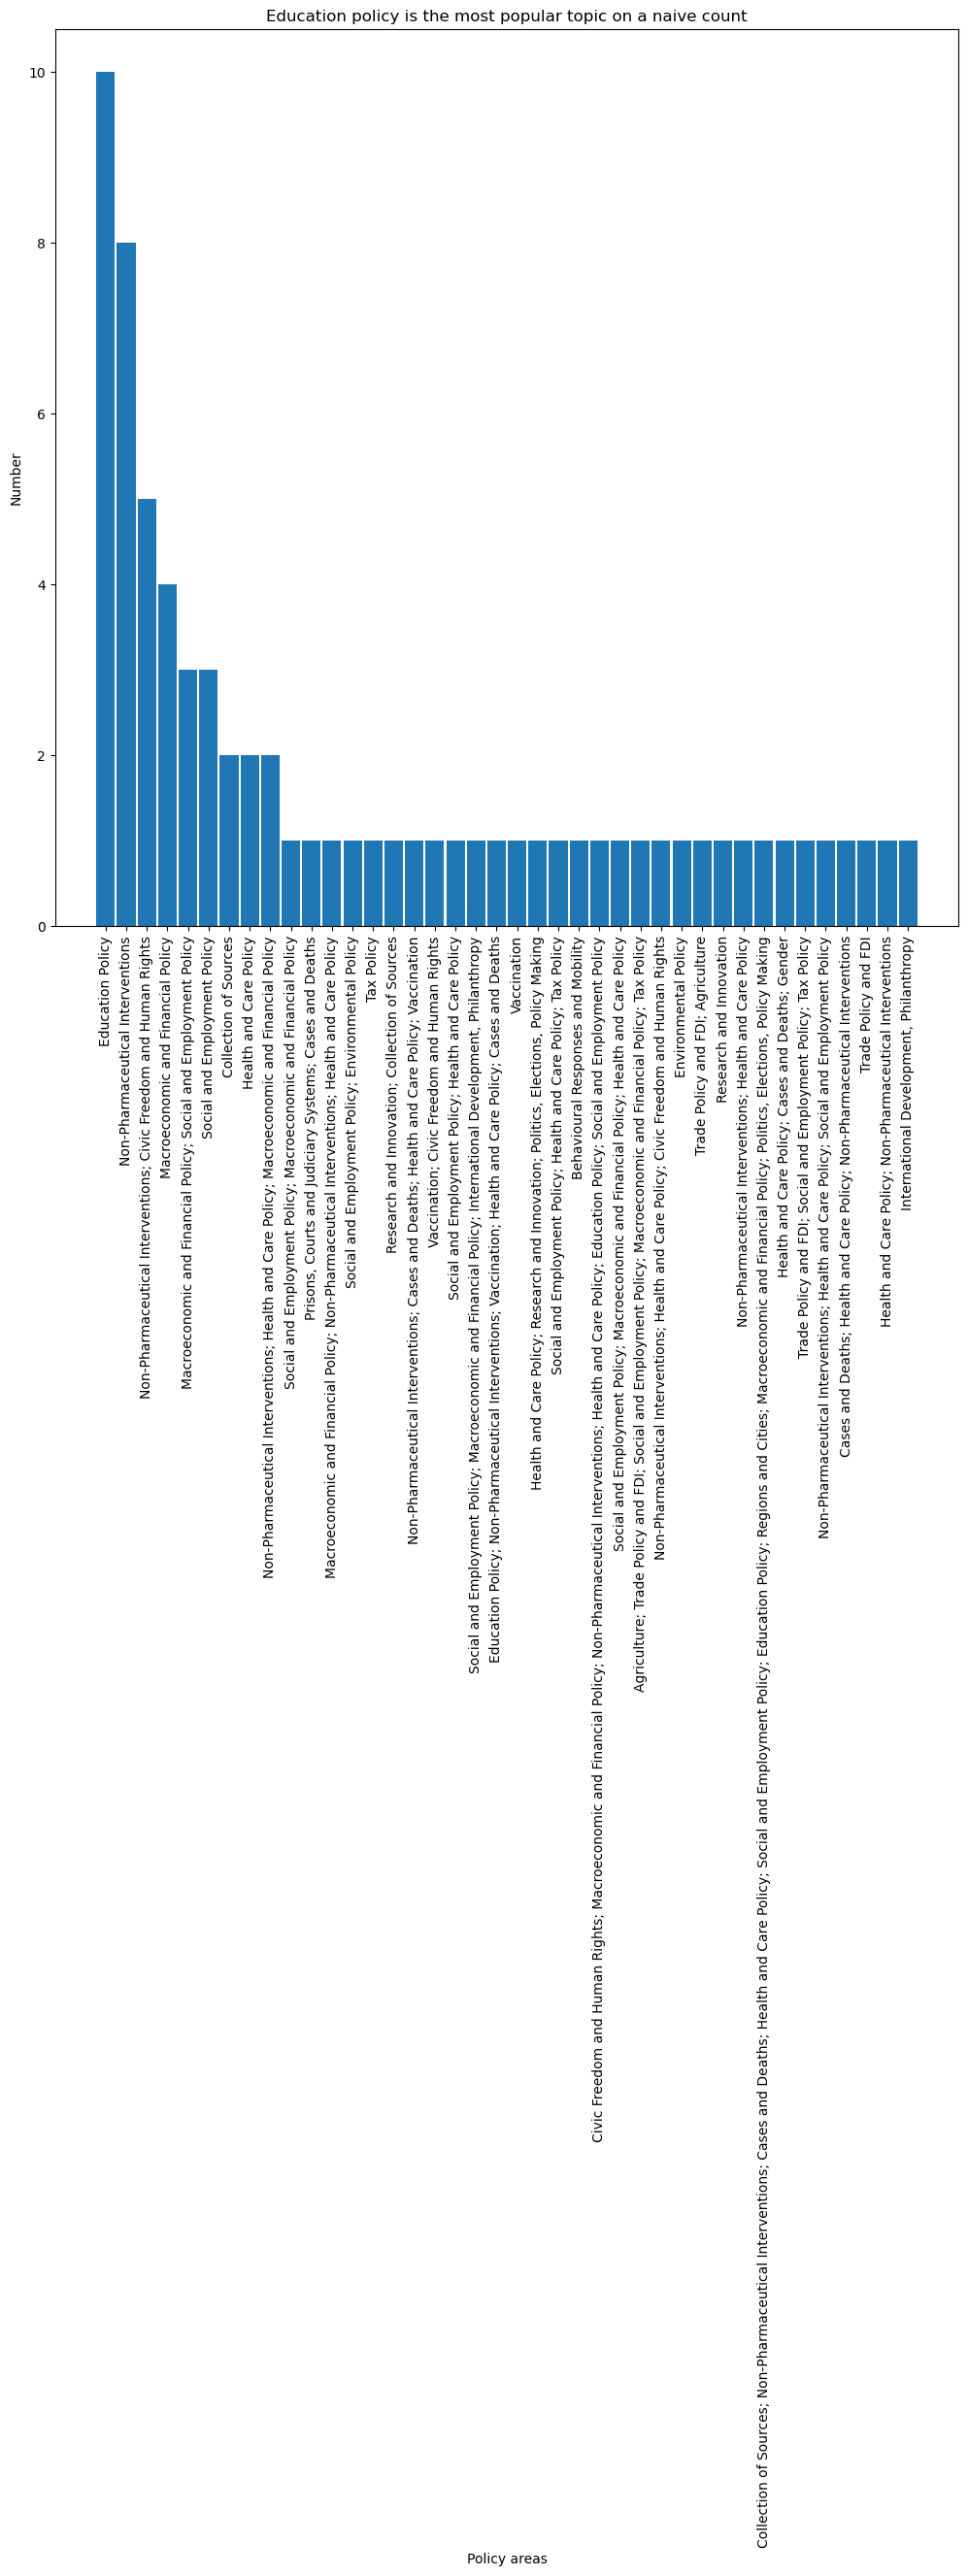

In [3821]:
# Plots counts
plt.figure(figsize =(12, 12))
plt.bar(policy_areas.index, height = policy_areas['Policy Area'], width = 0.9, color = None)
plt.xticks(rotation=90)
plt.title('Education policy is the most popular topic on a naive count')
plt.xlabel('Policy areas')
plt.ylabel('Number')
plt.show()

<div class="alert-info">
On a naive groupinbg of the policy area tags, 'education policy' and then 'non-pharmaceutical interventions' are the most common. It's a naive count, because the bunching of policy areas creates unique entries in the column, some of which might contain more popular tags that rarely occur alone. But there is something useful that's suggested by the naive count: education policy might be a type of intervention that doesn't often cluster with any other type. 
    
<br>
    
But let's first have look at how the data policy tags might have been entered. Below is the list of policy areas from the Oxford Supertracker <a href="https://supertracker.spi.ox.ac.uk/documentation/" target="_blank">documentation</a>.
</div>

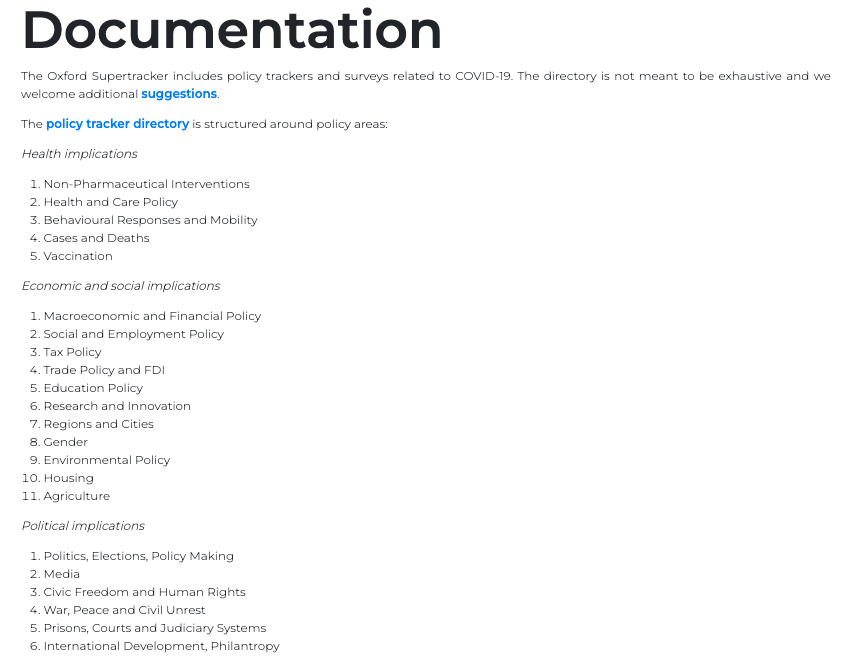

<div class="alert-info">
The policy areas list is logical and simple, and likely covers all of the topics that one might think of. But how did the entries get their labels? Let's have a look at the <a href="https://supertracker.spi.ox.ac.uk/submit-a-tracker/" target="_blank">submission form</a>.
</div>

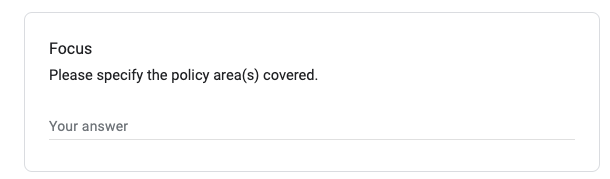

<div class="alert-info">
The box above is the only one on the form that takes identification of a policy area, but it's free form. As there are no drop-down lists here or elsewhere it's likely that the tags were attributed to submissions by editors at the tracker rather than the authors of the submissions. 
    
<br>
    
Looking at education policy entries below evidences this process somewhat, with submission authors likely having provided the text in the 'focus' column and their them being summarised with a policy area tag. 
</div>

In [3822]:
# Shows the text and entries given for education policy entries
focus_policy_areas.loc[focus_policy_areas['Policy Area'] == 'Education Policy']

,Title,Policy Area,Focus
2,CGD - COVID education policy tracking,Education Policy,school closures
8,COVID-19 Global Education Recovery Tracker,Education Policy,"Tracks ongoing information about the global status of schools, teachers and students amid the COVID-19 pandemic, such as in-person/remote teaching and its related support."
16,COVID-19 School Data Hub,Education Policy,"A central database for educators, researchers, and policymakers to understand how the COVID-19 pandemic shaped students’ modes of learning in 2020-21 in the USA."
22,Cato COVID-19 Permanent Private School Closures,Education Policy,Permanent closures of private schools at least partially connected to COVID-19 since the beginning of local and state lockdowns by religious affiliation. Private school enrolment survey.
38,How are children going back to school in America's 225 largest public school districts?,Education Policy,"Provides the 2020-2021 back-to-school policies, such as online or in-person teaching, of the America's 225 largest public school districts"
55,School COVID Survey,Education Policy,"Provides school policies in the districts of four US states (NY, NJ, CT, PA) in the 2020-2021."
58,Stanford School Enrollment Project 2020-2021,Education Policy,"Examines COVID-19’s impact on school enrollment from 33 state education departments including ~70,000 public schools. Most states provided data down to the grade level; some also provided student counts by gender, race, ethnicity, ELL status, homelessness, economic status, and/or disability. The timeframes vary, but include at least the 2019–20 and 2020–21 school years for each state. Bulk download: https://purl.stanford.edu/zf406jp4427"
65,UNESCO COVID-19 Educational Disruption and Response,Education Policy,school closures
68,World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results),Education Policy,National education responses to school closures related to the COVID-19 pandemic by surveying Ministries of Education and national statistics units. [See here for aggregate results](https://infogram.com/copy-copy-covid-fig-_r4-1hke60d1x7m525r?live).
69,World Bank Education Team COVID tracking database and map of school closures,Education Policy,"School closures related to the COVID-19 pandemic, number of children out of school, and schools reopening"


<div class="alert-info">
Let's look at some more complicated entries. 
</div>

In [3823]:
# Finds select, complicated entries
focus_policy_areas.iloc[[24, 39, 68]]

,Title,Policy Area,Focus
24,Corona Daten Plattform,"Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making","provides datasets on Germany on a broadrange of issues .disaggregated at the state-, and district level Free registration is required for data access."
39,IGC COVID-19 tracker,"Social and Employment Policy; Macroeconomic and Financial Policy; International Development, Philanthropy","economic support measures for countries worldwide by 1) wage/employment support, 2) cash transfers, 3) credit schemes/guarantees/ business support, 4) tax delays/deferrals, 5) tax cuts/ cancellations/exemptions/credits, 6) Interest rate cuts/liquidity measures/ other monetary measures"
68,World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results),Education Policy,National education responses to school closures related to the COVID-19 pandemic by surveying Ministries of Education and national statistics units. [See here for aggregate results](https://infogram.com/copy-copy-covid-fig-_r4-1hke60d1x7m525r?live).


<div class="alert-info">
The policy area tags for these entries are notable for the fact that the free text in the Focus column is in two of the instances not enough to justify the tags given. There must have been editorial investigation of the sources that went beyond the submissions. 
    
<br>

We've also still got a problem with the entries that described as being a 'collection'. We previously addressed those that had their type listed as 'collection'. But some are still solely described as a 'Collection of Sources' in the policy area column, or have the term as one of several tags. Given that we've decided to focus on policy trackers, it will be more helpful to have the former hold tags on what they are tracking - even in a meta way - and the latter not include the term at all. 
    
<br> 
Let's rename the entries that are listed as 'Collection of Sources' to a relevant policy category or set of them.   
</div>

In [3824]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Policy Area'] == 'Collection of Sources']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
14,COVID-19 Resource Tracker: A Guide to State and Local Responses,https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses,Collection of Sources,"This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residents work, learn, and vote from home.",USA,xlsx,[Urban Institute](https://twitter.com/urbaninstitute),Policy Tracker,sub-national,2020-03-01,2021-04-09,Governmental agencies; Media; Academics; Think tanks; other trackers,English,North America,Think tanks
51,OxCOVID19 Database,https://covid19.eng.ox.ac.uk/,Collection of Sources,"large, single-centre, multimodal relational database consisting of information (using acknowledged Sources) related to COVID-19 pandemic. OxCOVID19 Database is currenlty comprised of six tables: EPIDEMIOLOGY, GOVERNMENT_RESPONSE, COUNTRY_STATISTICS, MOBILITY, WEATHER and ADMINISTRATIVE_DIVISION.",worldwide,csv; PostgreSQL,"[University of Oxford, Department of Engineering Science](https://twitter.com/OxEngineering)",Policy Tracker,NaN,2020-01-30,up-to-date,Governmental agencies; International organisations; Academics,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Academics


<div class="alert-info">
Let's change the policy area for the COVID-19 Resource Tracker first, using the categories listed on its website. 
</div>

In [3825]:
# Changes the policy areas for COVID-19 Resource Tracker: A Guide to State and Local Responses
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 Resource Tracker: A Guide to State and Local Responses', na=False), ['Policy Area']] = 'Health and Care Policy; Non-Pharmaceutical Interventions; Housing; Social and Employment Policy; Education Policy; Politics, Elections, Policy Making'

In [3826]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Resource Tracker: A Guide to State and Local Responses']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
14,COVID-19 Resource Tracker: A Guide to State and Local Responses,https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses,"Health and Care Policy; Non-Pharmaceutical Interventions; Housing; Social and Employment Policy; Education Policy; Politics, Elections, Policy Making","This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residents work, learn, and vote from home.",USA,xlsx,[Urban Institute](https://twitter.com/urbaninstitute),Policy Tracker,sub-national,2020-03-01,2021-04-09,Governmental agencies; Media; Academics; Think tanks; other trackers,English,North America,Think tanks


<div class="alert-info">
We'll actually remove the OxCOVID19 Database as its policy trackling refers to the Oxford Covid-19 Government Response Tracker, which is listed elsewhere in the dataset. 

</div>

In [3827]:
# Removes the OxCOVID19 Database 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('OxCOVID19 Database', na=False)].index)

In [3828]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'OxCOVID19 Database']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider


In [3829]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [3830]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 69 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Now we'll remove the cluster references from the other entries.
</div>

In [3831]:
# Finds the entries with 'collection' in their policy area tags
oxford_supertracker.loc[oxford_supertracker['Policy Area'].str.contains('Collection')]

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
24,Corona Daten Plattform,https://www.corona-datenplattform.de/,"Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making","provides datasets on Germany on a broadrange of issues .disaggregated at the state-, and district level Free registration is required for data access.",DEU,csv,[infas](https://www.infas.de/); [German Federal Ministry for Economic Affairs and Energy](https://www.bmwi.de/Navigation/EN/Home/home.html),Policy Tracker,sub-national,2020-03-11,up-to-date,Governmental agencies; Academics,German,West Europe,Governmental agencies
49,Open Government Approaches to Tackling COVID-19,https://www.opengovpartnership.org/collecting-open-government-approaches-to-covid-19/,Research and Innovation; Collection of Sources,"a list of open government approaches, such as citizen-led community responses, Building trust between government and citizens, Transparency over forecasting models and data, Digital platforms or apps, Tackling misinformation online",worldwide; ARG; AUS; AZE; BHR; BGD; BEL; BEN; BOL; BRA; BGR; CMR; CAN; CHL; CHN; COL; CRI; HRV; DMA; ECU; SLV; EST; FJI; FRA; GEO; DEU; GHA; GRC; GTM; HTI; HND; HKG; IND; IDN; IRL; ISR; ITA; JOR; KEN; KOR; KWT; LVA; LIE; LTU; MAC; MYS; MLI; MEX; MNG; MAR; NAM; NPL; NLD; NER; NGA; NOR; OMN; PAK; PAN; PRY; PER; PHL; PRT; REU; ROU; SGP; SVK; SOM; ZAF; ESP; LKA; CHE; TWN; THA; TUN; UGA; UKR; ARE; GBR; URY; VEN; JEY; SRB; USA,xlsx; csv,[Open Gov Partnership](https://twitter.com/opengovpart),Policy Tracker,national,2020-03-19,2021-05-23,Governmental agencies; Think tanks; Companies; Media,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations


<div class="alert-info">
There are three entries to deal with. Let's go through those. 
</div>

In [3832]:
# Removes 'Collection of Sources' from the the policy areas for Corona Daten Plattform
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Open Government Approaches to Tackling COVID-19', na=False), ['Policy Area']] = 'Research and Innovation'

In [3833]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Open Government Approaches to Tackling COVID-19']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
49,Open Government Approaches to Tackling COVID-19,https://www.opengovpartnership.org/collecting-open-government-approaches-to-covid-19/,Research and Innovation,"a list of open government approaches, such as citizen-led community responses, Building trust between government and citizens, Transparency over forecasting models and data, Digital platforms or apps, Tackling misinformation online",worldwide; ARG; AUS; AZE; BHR; BGD; BEL; BEN; BOL; BRA; BGR; CMR; CAN; CHL; CHN; COL; CRI; HRV; DMA; ECU; SLV; EST; FJI; FRA; GEO; DEU; GHA; GRC; GTM; HTI; HND; HKG; IND; IDN; IRL; ISR; ITA; JOR; KEN; KOR; KWT; LVA; LIE; LTU; MAC; MYS; MLI; MEX; MNG; MAR; NAM; NPL; NLD; NER; NGA; NOR; OMN; PAK; PAN; PRY; PER; PHL; PRT; REU; ROU; SGP; SVK; SOM; ZAF; ESP; LKA; CHE; TWN; THA; TUN; UGA; UKR; ARE; GBR; URY; VEN; JEY; SRB; USA,xlsx; csv,[Open Gov Partnership](https://twitter.com/opengovpart),Policy Tracker,national,2020-03-19,2021-05-23,Governmental agencies; Think tanks; Companies; Media,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,International organisations


In [3834]:
# Removes 'Collection of Sources' from the the policy areas for Corona Daten Plattform
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Corona Daten Plattform', na=False), ['Policy Area']] = 'Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making'

In [3835]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Corona Daten Plattform']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
24,Corona Daten Plattform,https://www.corona-datenplattform.de/,"Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making","provides datasets on Germany on a broadrange of issues .disaggregated at the state-, and district level Free registration is required for data access.",DEU,csv,[infas](https://www.infas.de/); [German Federal Ministry for Economic Affairs and Energy](https://www.bmwi.de/Navigation/EN/Home/home.html),Policy Tracker,sub-national,2020-03-11,up-to-date,Governmental agencies; Academics,German,West Europe,Governmental agencies


In [3836]:
# Removes 'Collection of Sources' from the the policy areas for Corona Daten Plattform
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('SARS-CoV-2 and COVID-19 DATA HUB', na=False), ['Policy Area']] = 'Health and Care Policy; Non-Pharmaceutical Interventions'

In [3837]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'SARS-CoV-2 and COVID-19 DATA HUB']

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider


<div class="alert-info">
And let's double-check on any entries with 'Collection of Sources' remaining in their policy area tags. 
</div>

In [3838]:
# Finds the entries with 'collection' in their policy area tags
oxford_supertracker.loc[oxford_supertracker['Policy Area'].str.contains('Collection')]

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider


<div class="alert-info">
As all entries are also now listed as policy trackers, we can drop the 'type' column. 
</div>

In [3839]:
# Drops the Type column
oxford_supertracker = oxford_supertracker.drop(columns = 'Type')

In [3840]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [3841]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 69 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Having underaken the cleaning steps above, let's search in a non-naive way for how often the policy areas occur. The first step we'll take is to make a definitive list of the policy area search terms which agrees with the documentation.  
</div>

In [3842]:
# Gets the set of unique and edited policy areas
policy_areas_edited = focus_policy_areas['Policy Area'].unique()

# Converts the array to a list
policy_areas_edited = policy_areas_edited.tolist()

# Shows starting list
policy_areas_edited

['Non-Pharmaceutical Interventions',
 'Macroeconomic and Financial Policy',
 'Education Policy',
 'Health and Care Policy; Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions; Civic Freedom and Human Rights',
 'Health and Care Policy',
 'Collection of Sources',
 'Trade Policy and FDI',
 'Cases and Deaths; Health and Care Policy; Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions; Health and Care Policy; Social and Employment Policy',
 'Trade Policy and FDI; Social and Employment Policy; Tax Policy',
 'Health and Care Policy; Cases and Deaths; Gender',
 'Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making',
 'Non-Pharmaceutical Interventions; Health and Care Policy',
 'Research and Innovation',
 'Macroeconomic and Financial Policy; Social and Employment Policy',
 'Tra

In [3843]:
# Creates holding list of terms
policy_areas_holding = []

In [3844]:
# Loops through the entries in the edited list
for entry in policy_areas_edited:
    # Splits any entry with a semi-colon and puts it into the holding list
    policy_areas_holding.append(entry.split('; '))

In [3845]:
# Creates a list for the definitive terms
policy_areas_definitive = []

In [3846]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in policy_areas_holding:
    # Loops through the policy areas in each entry
    for area in entry:
        # Checks if the area is not repetitious
        if area not in policy_areas_definitive:
            # Adds the area to the definitive list if it isn't already in it
            policy_areas_definitive.append(area)

In [3847]:
# Sorts final list alphabetically
policy_areas_definitive.sort()

In [3848]:
# Removes 'Collection of Sources
policy_areas_definitive.pop(4)

'Collection of Sources'

In [3849]:
# Sorts final list
policy_areas_definitive

['Agriculture',
 'Behavioural Responses and Mobility',
 'Cases and Deaths',
 'Civic Freedom and Human Rights',
 'Education Policy',
 'Environmental Policy',
 'Gender',
 'Health and Care Policy',
 'International Development, Philanthropy',
 'Macroeconomic and Financial Policy',
 'Non-Pharmaceutical Interventions',
 'Politics, Elections, Policy Making',
 'Prisons, Courts and Judiciary Systems',
 'Regions and Cities',
 'Research and Innovation',
 'Social and Employment Policy',
 'Tax Policy',
 'Trade Policy and FDI',
 'Vaccination']

<div class="alert-info">
Looking again at the <a href="https://supertracker.spi.ox.ac.uk/documentation/" target="_blank">documentation</a>, every term in the definitive list is from the set of terms used by the editors, but there are three of the latter that aren't attached to any entry in the database: housing; media; War, Peace and Civil Unrest. That's interesting, as it raises questions about activity in those areas or the tracking of it.
</div>

In [3850]:
# Makes counters for policy areas terms used
agriculture = 0
behavioural_responses_and_mobility = 0
cases_and_deaths = 0
civic_freedom_and_human_rights = 0
education_policy = 0
environmental_policy = 0
gender = 0
health_and_care_policy = 0
international_development_philanthropy = 0
macroeconomic_and_financial_policy = 0
non_pharmaceutical_interventions = 0
politics_elections_policy_making = 0
prisons_courts_and_judiciary_systems = 0
regions_and_cities = 0
research_and_innovation = 0
social_and_employment_policy = 0
tax_policy = 0
trade_policy_and_fdi = 0
vaccination = 0

In [3851]:
# Creates list for all policy areas entered
policy_areas_entered = oxford_supertracker['Policy Area'].tolist()

In [3852]:
# Makes into a list
type(policy_areas_entered)

list

In [3853]:
policy_areas_entered

['Non-Pharmaceutical Interventions',
 'Macroeconomic and Financial Policy',
 'Education Policy',
 'Health and Care Policy; Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions',
 'Macroeconomic and Financial Policy',
 'Macroeconomic and Financial Policy',
 'Education Policy',
 'Non-Pharmaceutical Interventions; Civic Freedom and Human Rights',
 'Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions; Civic Freedom and Human Rights',
 'Health and Care Policy',
 'Health and Care Policy',
 'Health and Care Policy; Non-Pharmaceutical Interventions; Housing; Social and Employment Policy; Education Policy; Politics, Elections, Policy Making',
 'Non-Pharmaceutical Interventions; Civic Freedom and Human Rights',
 'Education Policy',
 'Trade Policy and FDI',
 'Cases and Deaths; Health and Care Policy; Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions; Health and Care Policy; Social and Employment Policy',
 

In [3854]:
# Creates holding list of terms
policy_areas_entered_holding = []

In [3855]:
# Loops through the entries in the entered list
for entry in policy_areas_entered:
    # Splits any entry with a semi-colon and puts it into the holding list
    policy_areas_entered_holding.append(entry.split('; '))

In [3856]:
# Creates a list for the definitive terms
policy_areas_entered = []

In [3857]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in policy_areas_holding:
    # Loops through the policy areas in each entry
    for area in entry:
        # Adds the area to the definitive list if it isn't already in it
        policy_areas_entered.append(area)

In [3858]:
# Checks entered list
policy_areas_entered

['Non-Pharmaceutical Interventions',
 'Macroeconomic and Financial Policy',
 'Education Policy',
 'Health and Care Policy',
 'Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions',
 'Civic Freedom and Human Rights',
 'Health and Care Policy',
 'Collection of Sources',
 'Trade Policy and FDI',
 'Cases and Deaths',
 'Health and Care Policy',
 'Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions',
 'Health and Care Policy',
 'Social and Employment Policy',
 'Trade Policy and FDI',
 'Social and Employment Policy',
 'Tax Policy',
 'Health and Care Policy',
 'Cases and Deaths',
 'Gender',
 'Collection of Sources',
 'Non-Pharmaceutical Interventions',
 'Cases and Deaths',
 'Health and Care Policy',
 'Social and Employment Policy',
 'Education Policy',
 'Regions and Cities',
 'Macroeconomic and Financial Policy',
 'Politics, Elections, Policy Making',
 'Non-Pharmaceutical Interventions',
 'Health and Care Policy',
 'Research and Innovation',
 'Macroeconomic a

In [3883]:
# Loops through list of entered terms
for area in policy_areas_entered:
    # Checks areas against list of terms
    if area == 'Agriculture':
        agriculture += 1
    if area == 'Behavioural Responses and Mobility':
        behavioural_responses_and_mobility += 1
    if area == 'Cases and Deaths':
        cases_and_deaths += 1
    if area == 'Civic Freedom and Human Rights':
        civic_freedom_and_human_rights += 1
    if area == 'Education Policy':
        education_policy += 1
    if area == 'Environmental Policy':
        environmental_policy += 1
    if area == 'Gender':
        gender += 1
    if area == 'Health and Care Policy':
        health_and_care_policy += 1
    if area == 'International Development, Philanthropy':
        international_development_philanthropy += 1
    if area == 'Macroeconomic and Financial Policy':
        macroeconomic_and_financial_policy += 1
    if area == 'Non-Pharmaceutical Interventions':
        non_pharmaceutical_interventions += 1
    if area == 'Politics, Elections, Policy Making':
        politics_elections_policy_making += 1
    if area == 'Prisons, Courts and Judiciary Systems':
        prisons_courts_and_judiciary_systems += 1
    if area == 'Regions and Cities':
        regions_and_cities += 1
    if area == 'Research and Innovation':
        research_and_innovation += 1
    if area == 'Social and Employment Policy':
        social_and_employment_policy += 1
    if area == 'Tax Policy':
        tax_policy += 1
    if area == 'Trade Policy and FDI':
        trade_policy_and_fdi += 1
    if area == 'Vaccination':
        vaccination += 1

'Agriculture' has 8 tags
'Behavioural Responses and Mobility' has 4 tags
'Cases and Deaths' has 12 tags
'Civic Freedom and Human Rights' has 8 tags
'Education Policy' has 8 tags
'Environmental Policy' has 4 tags
'Gender' has 2 tags
'Health and Care Policy' has 34 tags
'International Development, Philanthropy' has 4 tags
'Macroeconomic and Financial Policy' has 20 tags
'Non-Pharmaceutical Interventions' has 26 tags
'Politics, Elections, Policy Making' has 4 tags
'Prisons, Courts and Judiciary Systems' has 2 tags
'Regions and Cities' has 2 tags
'Research and Innovation' has 6 tags
'Social and Employment Policy' has 26 tags
'Tax Policy' has 8 tags
'Trade Policy and FDI' has 8 tags
'Vaccination' has 52 tags


In [3903]:
# Creates dictionary of policy areas tags
policy_areas_tags_counts = {}

In [3913]:
# Adds entries to the dictionary, adding the three areas with no entries
policy_areas_tags_counts['Agriculture'] = agriculture
policy_areas_tags_counts['Behavioural Responses and Mobility'] = behavioural_responses_and_mobility
policy_areas_tags_counts['Cases and Deaths'] = cases_and_deaths
policy_areas_tags_counts['Civic Freedom and Human Rights'] = civic_freedom_and_human_rights
policy_areas_tags_counts['Education Policy'] = education_policy
policy_areas_tags_counts['Environmental Policy'] = environmental_policy
policy_areas_tags_counts['Gender'] = gender
policy_areas_tags_counts['Health and Care Policy'] = health_and_care_policy
policy_areas_tags_counts['International Development, Philanthropy'] = international_development_philanthropy
policy_areas_tags_counts['Macroeconomic and Financial Policy'] = macroeconomic_and_financial_policy
policy_areas_tags_counts['Non-Pharmaceutical Interventions'] = non_pharmaceutical_interventions
policy_areas_tags_counts['Politics, Elections, Policy Making'] = politics_elections_policy_making
policy_areas_tags_counts['Prisons, Courts and Judiciary Systems'] = prisons_courts_and_judiciary_systems
policy_areas_tags_counts['Regions and Cities'] = regions_and_cities
policy_areas_tags_counts['Research and Innovation'] = research_and_innovation
policy_areas_tags_counts['Social and Employment Policy'] = social_and_employment_policy
policy_areas_tags_counts['Tax Policy'] = tax_policy
policy_areas_tags_counts['Trade Policy and FDI'] = trade_policy_and_fdi
policy_areas_tags_counts['Vaccination'] = vaccination
policy_areas_tags_counts['Housing'] = 0
policy_areas_tags_counts['Media'] = 0
policy_areas_tags_counts['War, Peace and Civil Unrest'] = 0

In [3923]:
# Puts the dictionary into a dataframe to be counted
policy_areas_tags_counts_frame = pd.DataFrame.from_dict(policy_areas_tags_counts, orient ='index', columns = ['Count']).sort_values(by ='Count', ascending = False)

# Shows frame
policy_areas_tags_counts_frame

,Count
Vaccination,52
Health and Care Policy,34
Non-Pharmaceutical Interventions,26
Social and Employment Policy,26
Macroeconomic and Financial Policy,20
Cases and Deaths,12
Agriculture,8
Civic Freedom and Human Rights,8
Education Policy,8
Trade Policy and FDI,8


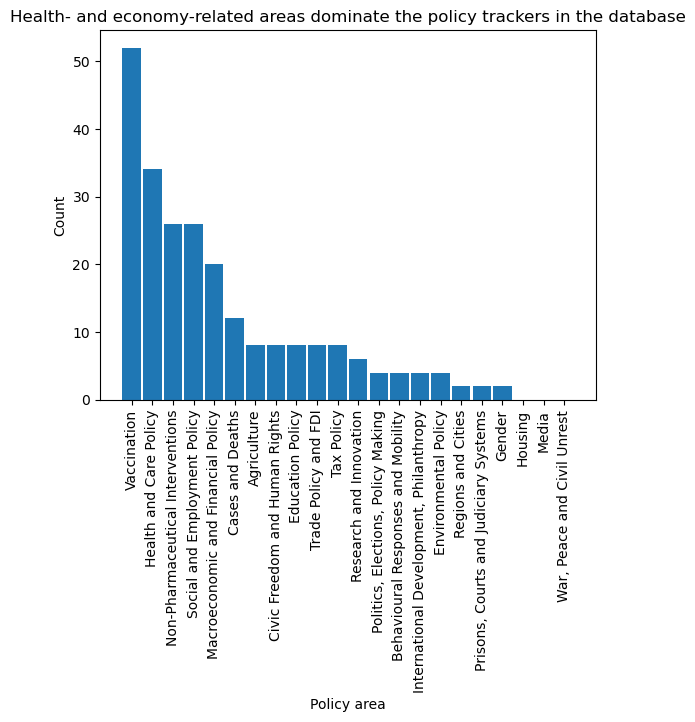

In [3927]:
# Makes barchart for the level of observation counts
plt.figure()
plt.bar(policy_areas_tags_counts_frame.index, policy_areas_tags_counts_frame['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('Health- and economy-related areas dominate the policy trackers in the database')
plt.xlabel('Policy area')
plt.ylabel('Count')
plt.show()

Need to remove cases and deaths. Discuss above. 

## Dates
<a id='dates'></a>

## Authors, source, and provider
<a id='authors_source_and_provider'></a>

## World region, country coverage, level of observation 
<a id='world_region_country_coverage_level_of_observation'></a>

<div class="alert-info">
    There is lots to know about the datasets: policy areas; focus; countries; publishers; level of administrative observation; and timings, pluse several other aspects of each dataset. Let's have a look at some of those aspects, starting with the level of administrative observation.
<br>

To begin with, how many levels of administrative observation are there? 
</div>

In [3860]:
# Gives the number of unique entries for the level of observation
oxford_supertracker['Level of Observation'].nunique()

4

<div class="alert-info">
There are six types of unique entry in the level of administrative observation column. 
</div>

In [3861]:
# Gives the unique entries for the level of observation
administrative_units = oxford_supertracker['Level of Observation'].unique()

# Prints the unique administrative units
print(administrative_units)

['national' 'national; sub-national' 'sub-national' 'firm-level' nan]


<div class="alert-info">
And those six types cover organisational units from the smallest - firms - up to supranational. But at which level are the datasets focused?
</div>

In [3862]:
# Gets the number of entries by the level of observation
entries_by_administrative_level = oxford_supertracker.groupby('Level of Observation').size()

# Puts the count into a dataframe
entries_by_administrative_level =  pd.DataFrame(entries_by_administrative_level)

# Renames first column 
entries_by_administrative_level.rename(columns = {0: 'Count'}, inplace = True)

# Sorts by the count column
entries_by_administrative_level = entries_by_administrative_level.sort_values(by = ['Count'], ascending = False)

# Shows counts
entries_by_administrative_level

,Count
Level of Observation,
national,40
sub-national,15
national; sub-national,12
firm-level,1


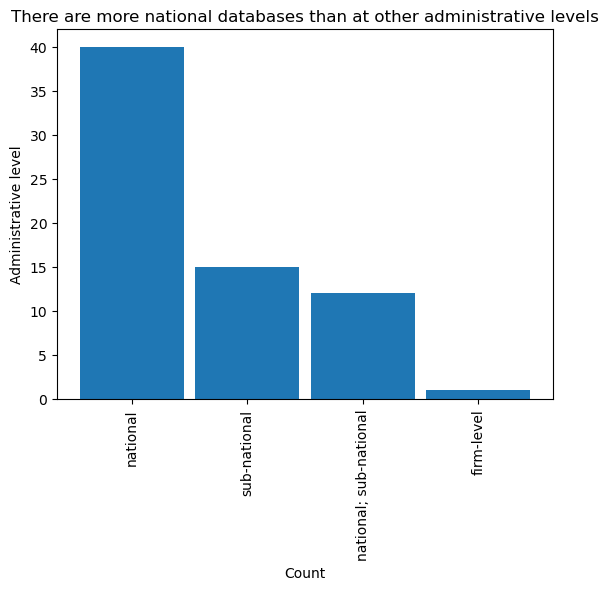

In [3863]:
# Makes barchart for the level of observation counts
plt.figure()
plt.bar(entries_by_administrative_level.index, entries_by_administrative_level['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('There are more national databases than at other administrative levels')
plt.xlabel('Count')
plt.ylabel('Administrative level')
plt.show()

<div class="alert-info">
On a simple count it looks like the Covid policy monitors around the world were focused on following what national governments were doing. Three times as many tracked at the national level than the sub-national one, despite the latter probably having meaningful powers to affect the pandemic in many countries. Perhaps this is because it was easier for researchers to follow and measure the policy decisions of national governments. 
    
<br>
    
The national-focused datasets are likely where much of the internationally comparative work on Covid will take place, but let's look first at a couple of the oddities in the Oxford Supertracker: the supranational and firm-level datasets.      
    
</div>

In [3864]:
# Finds the supranational datasets
supranational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'supranational']

# Shows the supranational datasets
supranational_datasets 

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider


<div class="alert-info">
The dataframe with the two supranational datasets shows us that the naming seems to be based on the type of organisation doing the data collecting. For these two, it's the European Parliament tracking policy decisions across member states of the European Union, and the International Labour Organization (ILO) following social and employment actions across the world. Let's have a look at both. 
    
<br>
    
According to the ILO's <a href="https://ilo.org/global/topics/coronavirus/regional-country/country-responses/lang--en/index.htm" target="_blank">page</a> on its tracker of Covid country policy responses, the policy actions of 188 governments, employers' and workers's bodies were tracked from 2020 to 2022. The policy reporting methodology is shown below.   
   
</div>

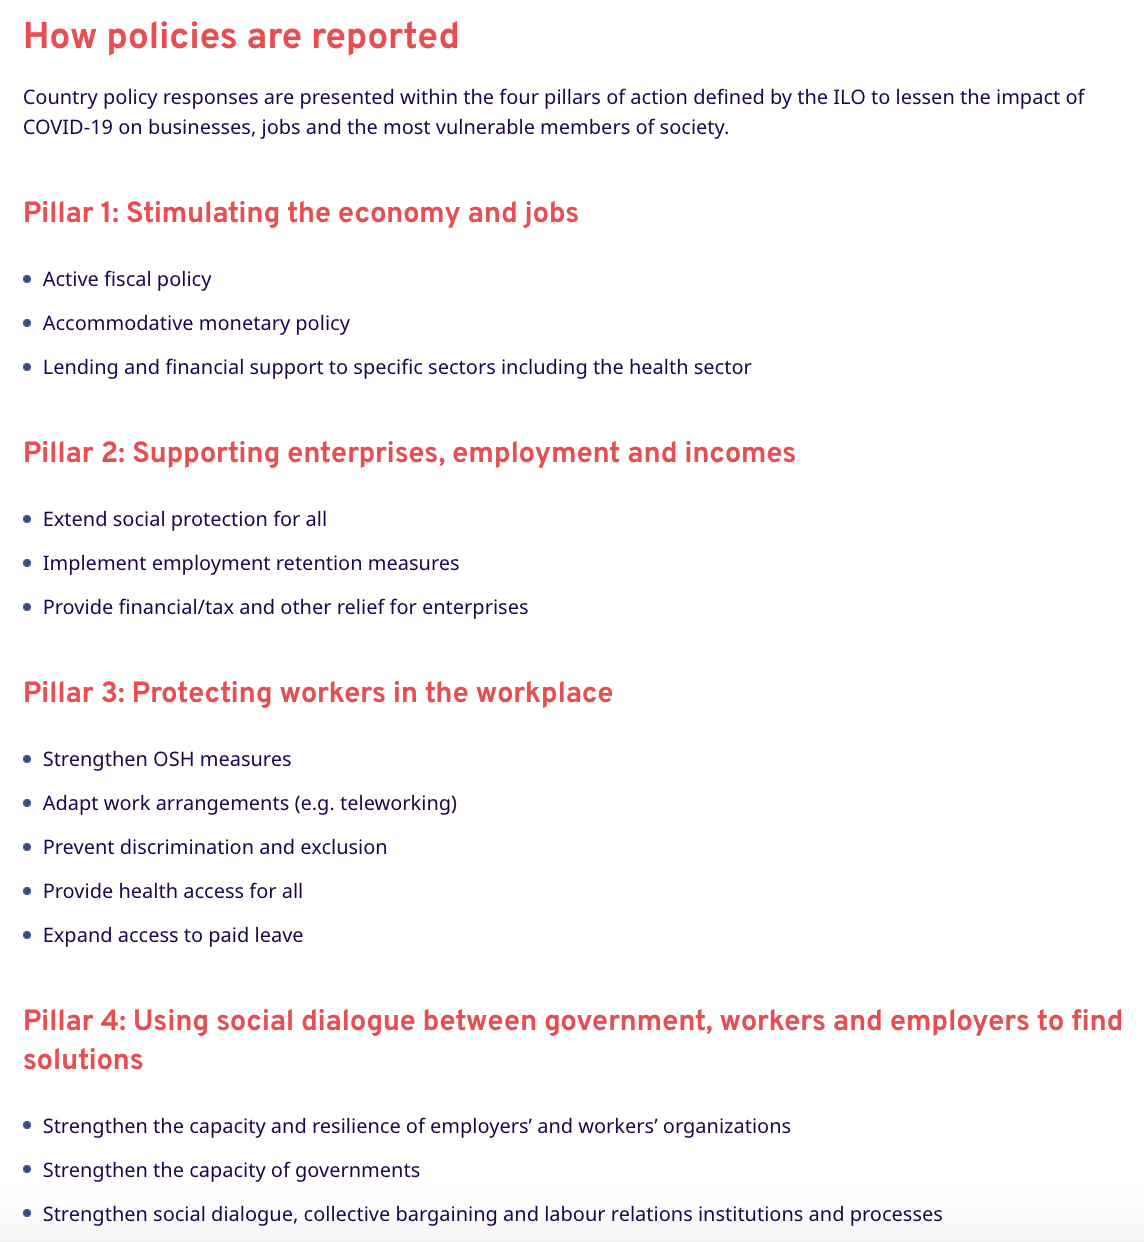

<div class="alert-info">
And let's now look at the firm-level datasets.    
   
</div>

In [3865]:
# Finds the firm-level datasets
supranational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'firm-level']

# Shows the the firm-level datasets
supranational_datasets 

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
28,Covid Stimulus Watch,https://covidstimuluswatch.org/,Macroeconomic and Financial Policy; Social and Employment Policy,"strengthen corporate accountability. It assembles CARES Act recipient data on grants and loans per firm and combines it with information about each firm's history of regulatory violations, previous government assistance, federal tax avoidance, and CEO and worker pay practices. It includes US firms receiving grants and loans through the CARES Act. At the moment; it contains more than 5;700 awards; totalling $54 billion.",USA,html; csv; xlsx,[Good Jobs First](https://twitter.com/GoodJobsFirst);\n[Phil Mattera](https://twitter.com/DirtDiggers);\n[Greg LeRoy](https://twitter.com/GregLeRoy4),firm-level,2020-04-30,up-to-date,Think tanks; Companies,English,North America,NGOs


<div class="alert-info">
The first dataset, <a href="https://sites.google.com/view/firmrisk/home?authuser=0" target="_blank">firm-level risk</a>, used text analysis to follow the sentiment towards, and risk-based views of, listed firms towards the pandemic in a collection of countries around the world to March 2021. This could, interestingly, be used to gauge the views of informed companies as to the ability of their national government to achieve the policy aims stated by officials. 
    
<br>
 
The second dataset, <a href="https://covidstimuluswatch.org/" target="_blank">Covid Stimulus Watch</a>, is a markedly different tracker. It monitored financial support provided to companies by US legislation over the pandemic.   
    
<br>
Let's also have a quick look at the next two categories with the fewest counts, and also the most confusing titles: 'national; sub-national'; and 'national; supranational'. What are these ones about?
   
</div>

In [3866]:
# Finds the national-subnational datasets
national_subnational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'national; sub-national']

# Shows the national-subnational datasets
national_subnational_datasets

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
2,CGD - COVID education policy tracking,https://docs.google.com/spreadsheets/d/1ndHgP53atJ5J-EtxgWcpSfYG8LdzHpUsnb6mWybErYg/edit#gid=0,Education Policy,school closures,worldwide; IND; BRA; NGA; USA; AFG; ALB; DZA; ASM; AND; AGO; ATG; ARG; ARM; ABW; AUS; AUT; AZE; BHS; BHR; BGD; BRB; BLR; BEL; BLZ; BEN; BMU; BTN; BOL; BIH; BWA; BRA; BRN; BGR; BFA; BDI; KHM; CMR; CAN; CYM; CAF; TCD; CHL; CHN; COL; COM; COG; CRI; HRV; CUB; CYP; CZE; DNK; DJI; DMA; DOM; ECU; EGY; SLV; GNQ; ERI; EST; ETH; FRO; FJI; FIN; FRA; PYF; GAB; GMB; GEO; DEU; GHA; GIB; GRC; GRL; GRD; GUM; GTM; GIN; GNB; GUY; HTI; HND; HKG; HUN; ISL; IND; IDN; IRQ; IRL; ISR; ITA; JAM; JPN; JOR; KAZ; KEN; KIR; KWT; LVA; LBN; LSO; LBR; LBY; LIE; LTU; LUX; MAC; MDG; MWI; MYS; MDV; MLI; MLT; MHL; MRT; MUS; MEX; MCO; MNG; MAR; MOZ; MMR; NAM; NRU; NPL; NLD; NCL; NZL; NIC; NER; NGA; MNP; NOR; OMN; PAK; PLW; PAN; PNG; PRY; PER; PHL; POL; PRT; PRI; QAT; ROU; RUS; RUS; RWA; WSM; SMR; SAU; SEN; SYC; SLE; SGP; SVN; SLB; SOM; ZAF; ESP; LKA; SDN; SUR; SWZ; SWE; CHE; SYR; TWN; TJK; THA; TLS; TGO; TON; TTO; TUN; TUR; TKM; TCA; TUV; UGA; UKR; ARE; GBR; URY; UZB; VUT; VEN; VNM; YEM; ZMB; ZWE; CUW; IMN; MNE; SRB; SXM; SSD; XKX,csv; xlsx; pdf; html,[Center for Global Development](https://twitter.com/CGDev);\n [Lee Crawfurd](https://twitter.com/leecrawfurd),national; sub-national,2020-02-12,up-to-date,Governmental agencies; International organisations; Media,English,worldwide; Sub-Saharan Africa; East Asia & Pacific; Eastern Europe & Central Asia; Latin America & the Caribbean; Middle East & North Africa; Southeast Asia; North America; West Europe,Think tanks
3,CIHI COVID-19 Intervention Scan,https://www.cihi.ca/en/covid-19-intervention-scan,Health and Care Policy; Non-Pharmaceutical Interventions,"It includes case finding and management, physical distancing, health workforce capacity, health service delivery, and travel restrictions as well as contextual information, such as the timing of spring breaks announced or implemented by federal, provincial and territorial governments as well as professional regulatory bodies.",Canada,xlsx,[Canadian Institute for Health Information (CIHI)](https://twitter.com/CIHI_ICIS),national; sub-national,2020-05-05,2022-01-31,Governmental agencies,English,North America,Governmental agencies
4,COVID Analysis and Mapping of Policies (AMP) site,https://covidamp.org/,Non-Pharmaceutical Interventions,non-pharmaceutical interventions. Available on a sub-national level for the USA.,ARG; AUS; BOL; BWA; BRA; CAN; TCD; COL; COG; DNK; DJI; ECU; EGY; SLV; EST; ETH; FRA; DEU; GHA; HND; IND; IRQ; IRL; ISR; ITA; JPN; JOR; LBY; MLI; MHL; MEX; MNG; MAR; NZL; NER; NGA; OMN; PAN; PER; PHL; RUS; RUS; SAU; SEN; SOM; ZAF; ESP; SWE; CHE; THA; UGA; GBR; USA; UMI; URY; YEM,html; xlsx,"[Georgetown Global Health Science & Security](https://twitter.com/georgetown_ghss);\n[Talus Analytics, LLC](https://twitter.com/talusanalytics/);\n[NTI](https://twitter.com/NTI_WMD)",national; sub-national,2020-01-01,up-to-date,Governmental agencies,English,worldwide; West Europe; North America; East Asia & Pacific; Southeast Asia; Middle East & North Africa; Latin America & the Caribbean; Eastern Europe & Central Asia; Sub-Saharan Africa,Academics
11,COVID-19 Protective Policy Index (PPI),https://www.binghamton.edu/political-science/covid-response/ppi-global-dataset/ppi-global-data.html,Non-Pharmaceutical Interventions; Civic Freedom and Human Rights,"The PPI measures public health government responses to COVID-19 at all levels of government in various categories including border closures, school closures, social gathering and social distancing limitations and closure/restriction of businesses and services.",worldwide; USA; CAN,csv,[Olga Shvetsova](http://bingweb.binghamton.edu/~shvetso/index.html); Abdul Basit Adeel; Michael Catalano; Olivia Catalano; Frank Gianne

In [3867]:
# Finds the national-supranational datasets
national_supranational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'national; supranational']

# Shows the national-supranational datasets
national_supranational_datasets

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider


<div class="alert-info">
The distinction between the levels of observation of a dataset doesn't seem to have been specified by the <a href="https://supertracker.spi.ox.ac.uk/" target="_blank">Oxford Supertracker</a>, and as shown by the screenshots below of the form for submitting policy trackers, it wasn't a characteristic that users could assert. 
   
</div>

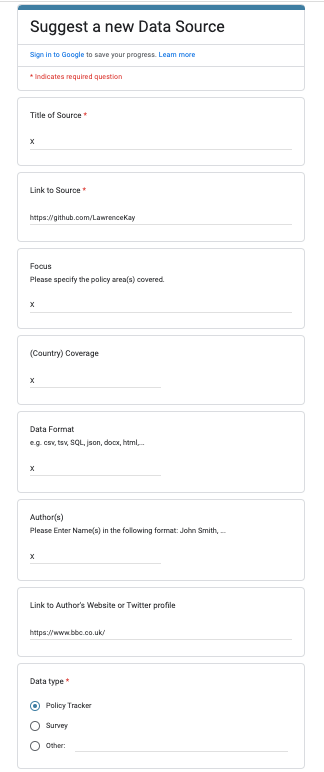

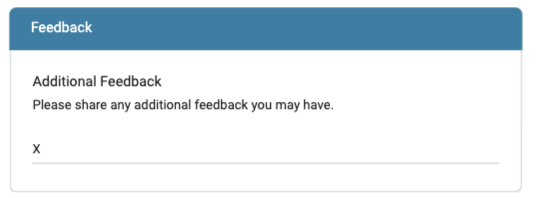

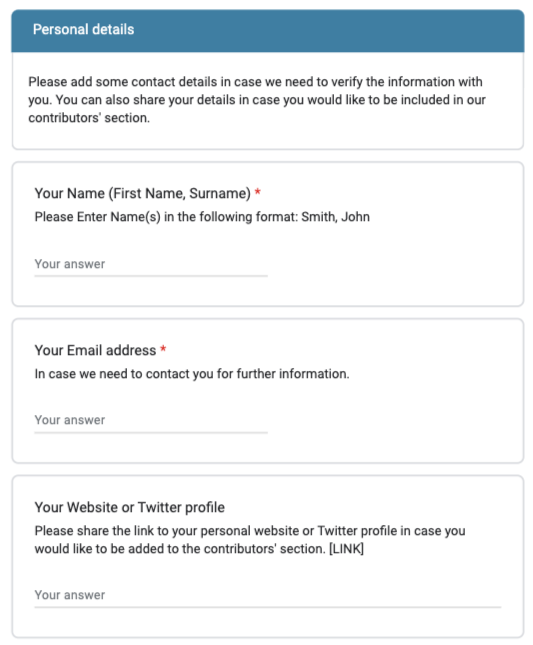

<div class="alert-info">
Given that there don't seem to be guidelines for what makes a dataset specific to one level of observation or another, it must have been determined by the editors of the tracker. Let's investigate what they decided, starting with the 'national; supranational datasets' as there are only four of them:
<br>    
      
- The <a href="https://civicspacewatch.eu/covid-19?_sf_s=economic" target="_blank">Civic Space Watch</a> by the European Civic Forum data doesn't seem to be accessible anymore. 
- The <a href="https://sites.google.com/view/atanaspekanov/economic-policy-response-map" target="_blank">Economic Policy Response Map</a> doesn't appear to have been completed. 
- The <a href="https://www.etuc.org/en/publication/covid-19-watch-etuc-briefing-notes" target="_blank">ETUC Briefing notes</a> is just a series of PDF briefings on labour and occuptaional health issues that arose during the pandemic, focused on European nations.  
- The <a href="https://www.eurofound.europa.eu/data/covid-19-eu-policywatch" target="_blank">COVID-19 EU PolicyWatch</a> is a list of measures and a database on the policies adopted by European Union governments as they sought to mitigate the effects of the pandemic on workers and companies.
    
What's the the theme that unites all of them? They focus on activities in European Union countries through a continent-wide lens. 'Supranational: European Union' would be a more accurate description of the observation level of the datasets. 
    
<br>  
What about the 'national; sub-national' ones? They're easier, in that each one has data at the national level for select countries, as well as the sub-national one for often a small subset. Most of the datasets are focused on the United States, many are just textual descriptions of policy decisions, and a good number seem to have not been maintained beyond an arbitrary point in 2020.

<div class="alert-info">
We've been through the four least populous categories and can be confident that the datasets in them have been labelled properly re their levels of observation. Let's move on to the sub-national ones.  
   
</div>

In [3868]:
# Finds the subnational datasets
subnational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'sub-national']

# Shows the subnational datasets
subnational_datasets

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
12,COVID-19 Reported Patient Impact and Hospital Capacity by Facility,https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u,Health and Care Policy,The dataset provides facility-level data for hospital utilization and coronavirus-related capacity aggregated on a weekly basis.,USA,csv; json; kmz; rdf; rss; xlsx,[U.S. Department of Health & Human Services](https://twitter.com/hhsgov),sub-national,2020-12-12,up-to-date,Governmental agencies,English,North America,Governmental agencies
13,COVID-19 Reported Patient Impact and Hospital Capacity by State,https://healthdata.gov/dataset/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/6xf2-c3ie,Health and Care Policy,The dataset provides state-aggregated data for hospital utilization and coronavirus-related capacity in the United States.,USA,csv; json; kmz; rdf; rss; xlsx,[U.S. Department of Health & Human Services](https://twitter.com/hhsgov),sub-national,2020-12-14,up-to-date,Governmental agencies,English,North America,Governmental agencies
14,COVID-19 Resource Tracker: A Guide to State and Local Responses,https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses,"Health and Care Policy; Non-Pharmaceutical Interventions; Housing; Social and Employment Policy; Education Policy; Politics, Elections, Policy Making","This guide is a spreadsheet compiling more than 100 resources tracking state and local data and policy responses in health care, food, housing, and income supports in the USA. It also includes resources on policies to reduce the spread of the disease, support specific populations, and help residents work, learn, and vote from home.",USA,xlsx,[Urban Institute](https://twitter.com/urbaninstitute),sub-national,2020-03-01,2021-04-09,Governmental agencies; Media; Academics; Think tanks; other trackers,English,North America,Think tanks
15,COVID-19 Restrictions Timeseries,https://data.london.gov.uk/dataset/covid-19-restrictions-timeseries,Non-Pharmaceutical Interventions; Civic Freedom and Human Rights,"National and local restrictions and policies affecting London., such as school closures, pub closures, shop closures, eating places closures, stay at home orders, bans on household mixing indoors, working from home, night curfews.",GBR,csv,[Greater London Authority](https://twitter.com/ldn_gov),sub-national,2020-03-01,up-to-date,Governmental agencies,English,West Europe,Governmental agencies
16,COVID-19 School Data Hub,https://www.covidschooldatahub.com/,Education Policy,"A central database for educators, researchers, and policymakers to understand how the COVID-19 pandemic shaped students’ modes of learning in 2020-21 in the USA.",USA,html; csv; xlsx,[Emily Oster](https://emilyoster.net/),sub-national,2020-09-01,2021-05-31,Governmental agencies,English,North America,Academics
18,COVID-19 US County Policies,https://github.com/hikmahealth/covid19countymap,Cases and Deaths; Health and Care Policy; Non-Pharmaceutical Interventions,"County-level COVID-19 policy dataset covering over 1,200 U.S. counties and Native American nations.",USA,html; csv,[Hikma Health](https://twitter.com/hikmahealth),sub-national,2020-03-01,2020-07-31,Governmental agencies; Media; Academics; Think tanks,English,North America,Companies
19,COVID-19 US state policy database (CUSP),https://tinyurl.com/statepolicies,Non-Pharmaceutical Interventions; Health and Care Policy; Social and Employment Policy,"dates of policy changes on the state level in the areas of non-pharmaceutical interventions, social policies, healthcare, racial disparities, etc.",USA,xlsx; csv,[Julia Raifman](https://twitter.com/JuliaRaifman);\n[Jacob Bor](https://twitter.com/JacobBor);\n[David K. Jones](https://twitter.com/dklinejones);\n[Sarah Lipson](https://twitter.com/DrSarahLipson);\n[Jonathan J

In [3869]:
# Counts the number of datasets, by rows
len(subnational_datasets)

15

<div class="alert-info">
There are 41 datasets categorised as 'sub-national', which is great, but it also creates a problem: having to go through them to judge how the category has been applied while also weeding out the missing ones. 
</div>

## Conclusion [NOTES]
<a id='conclusion'></a>

Could add the bureacrat definitions from LSE to define the micro public decisions that are encountered in US schools and prisons. 

Need to change aim desription from one that is about numeric datasets to one that allows spreadsheets with text in them. 

Remove policy tracker column 